In [1]:
import sys
sys.path.append('/home/painchess/projects_clean/Halo_Analytical_Calculations')
import numpy as np
import cosmo_parameters as cp
import halo_mass_function as hmf
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
from matplotlib import ticker


In [17]:
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams["figure.dpi"]= 150
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(params)

# Peak height $\nu$

## Peak height $\nu$ vs z

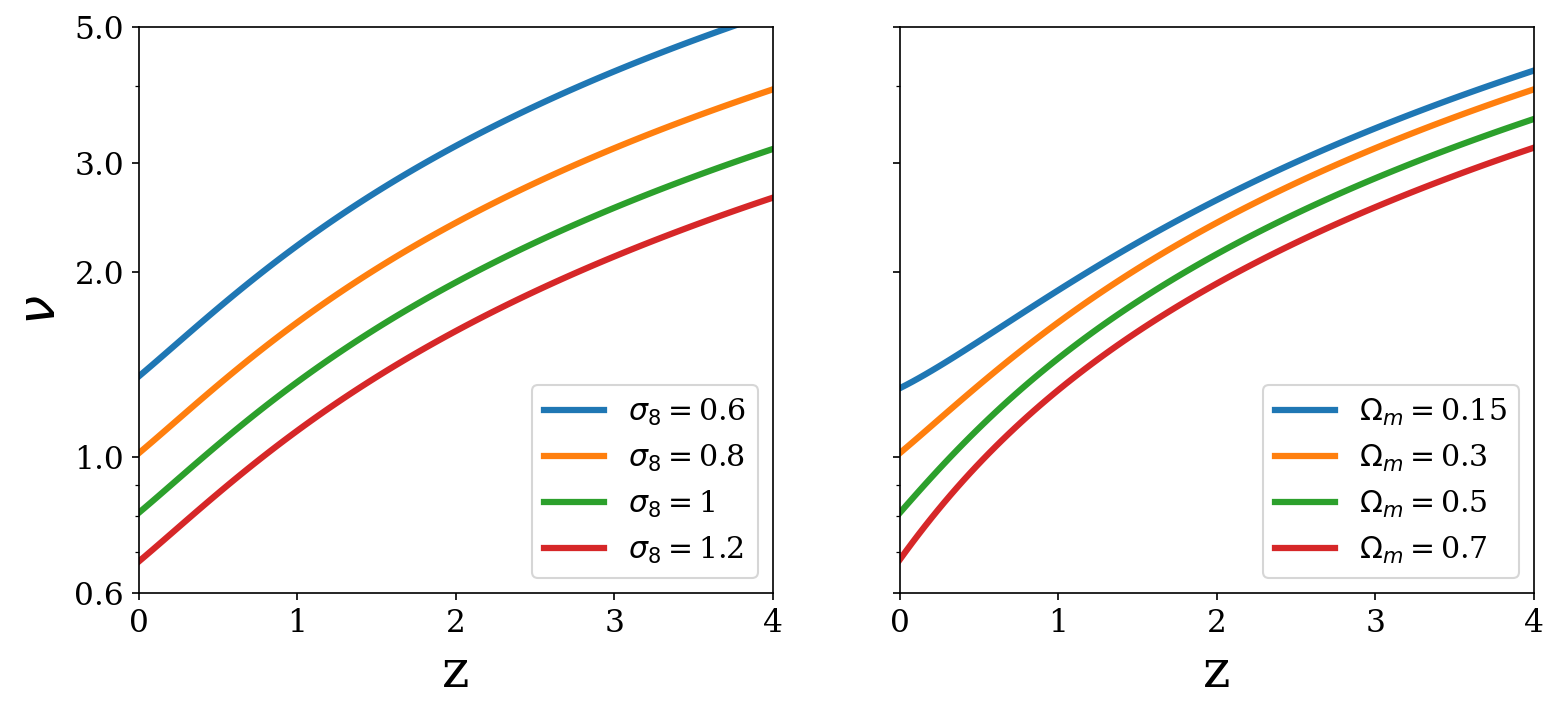

In [26]:
######################--------------- peak height z dependence----------################################################

zs = np.linspace(0, 4, 100)
s8 = [0.6, 0.8, 1, 1.2]
omv = [0.15, 0.3, 0.5, 0.7]

fig, axs = plt.subplots(1,2, figsize=[12,5], sharey=True)
for j in range(4):
    res1 = hmf.nu(4e12, zs, om0=0.3, ol0=0.7, sig8=s8[j], Colos=False)
    res2 = hmf.nu(4e12, zs, om0=omv[j], ol0=1-omv[j], sig8=0.8, Colos=False)
    axs[0].plot(zs, res1, '-', linewidth=3, label='$\sigma_8 =$'+str(s8[j]))
    axs[1].plot(zs, res2, '-', linewidth=3, label='$\Omega_m =$'+str(omv[j]))
    
for i in range(2):
    axs[i].legend(fontsize='x-large')
    axs[i].set_xlabel('z', size=25)
    axs[i].set_yscale('log')
    axs[i].tick_params(axis='x', labelsize=15)
    axs[i].tick_params(axis='y', labelsize=15)
    #axs[i].set_yticks(size=15)
    axs[i].set_xlim(0, 4)
axs[0].set_ylabel(r'$\nu$', size=25)

axs[0].set_yticks([0.6, 1, 2, 3, 5])
axs[0].yaxis.set_minor_formatter(ticker.NullFormatter())

axs[0].yaxis.set_major_formatter(ticker.ScalarFormatter())

axs[0].set_ylim(.6, 5)
plt.savefig('./figs/nu_sigma_omega_z.pdf', dpi=300, bbox_inches ='tight')
plt.savefig('./figs/nu_sigma__omega_z.png', dpi=300, bbox_inches ='tight')

plt.show()


## Peak height $\nu$ vs Mass

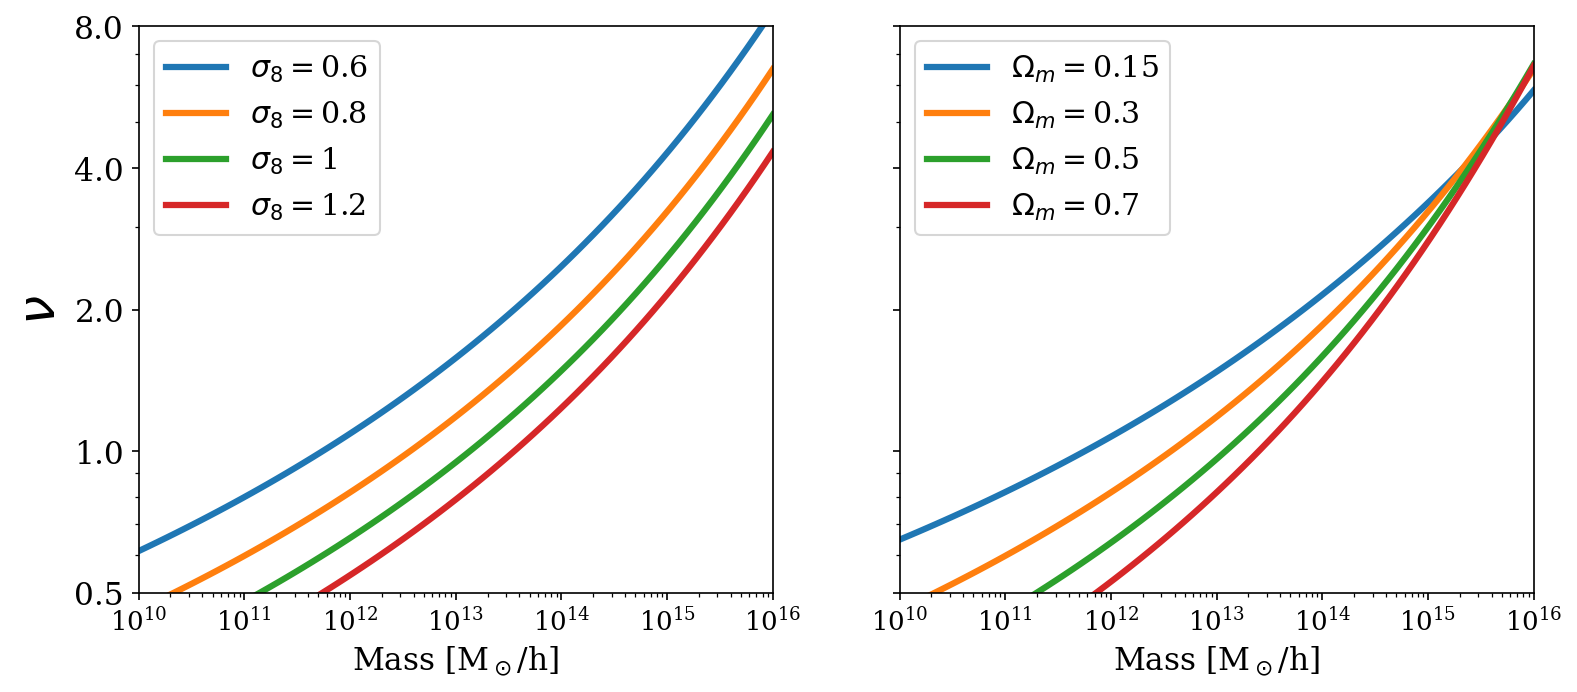

In [27]:
######################--------------- peak height z dependence----------################################################
mass = np.logspace(8, 16, 100)
s8 = [0.6, 0.8, 1, 1.2]
omv = [0.15, 0.3, 0.5, 0.7]

fig, axs = plt.subplots(1,2, figsize=[12,5], sharey=True)
for j in range(4):
    res1 = hmf.nu(mass, 0, om0=0.3, ol0=0.7, sig8=s8[j], Colos=False)
    res2 = hmf.nu(mass, 0, om0=omv[j], ol0=1-omv[j], sig8=0.8, Colos=False)
    axs[0].loglog(mass, res1, '-', linewidth=3, label='$\sigma_8 =$'+str(s8[j]))
    axs[1].loglog(mass, res2, '-', linewidth=3, label='$\Omega_m =$'+str(omv[j]))
    
for i in range(2):
    axs[i].legend(fontsize='x-large')
    axs[i].set_xlabel('Mass [M$_\odot$/h]', size=15)
    #axs[i].set_yscale('log')
    axs[i].tick_params(axis='x', labelsize=12.5)
    axs[i].tick_params(axis='y', labelsize=15)
    #axs[i].set_yticks(size=15)
    axs[i].set_xlim(1e10, 1e16)
axs[0].set_ylabel(r'$\nu$', size=25)

axs[0].set_yticks([0.5, 1, 2, 4, 8])
axs[0].yaxis.set_minor_formatter(ticker.NullFormatter())

axs[0].yaxis.set_major_formatter(ticker.ScalarFormatter())

axs[0].set_ylim(.5, 8)
plt.savefig('./figs/nu_sigma_omega_mass.pdf', dpi=300, bbox_inches ='tight')
plt.savefig('./figs/nu_sigma__omega_mass.png', dpi=300, bbox_inches ='tight')

plt.show()


## Peak height vs cosmology 

/tmp/ipykernel_9654/142509242.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])
/tmp/ipykernel_9654/142509242.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])
/tmp/ipykernel_9654/142509242.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])


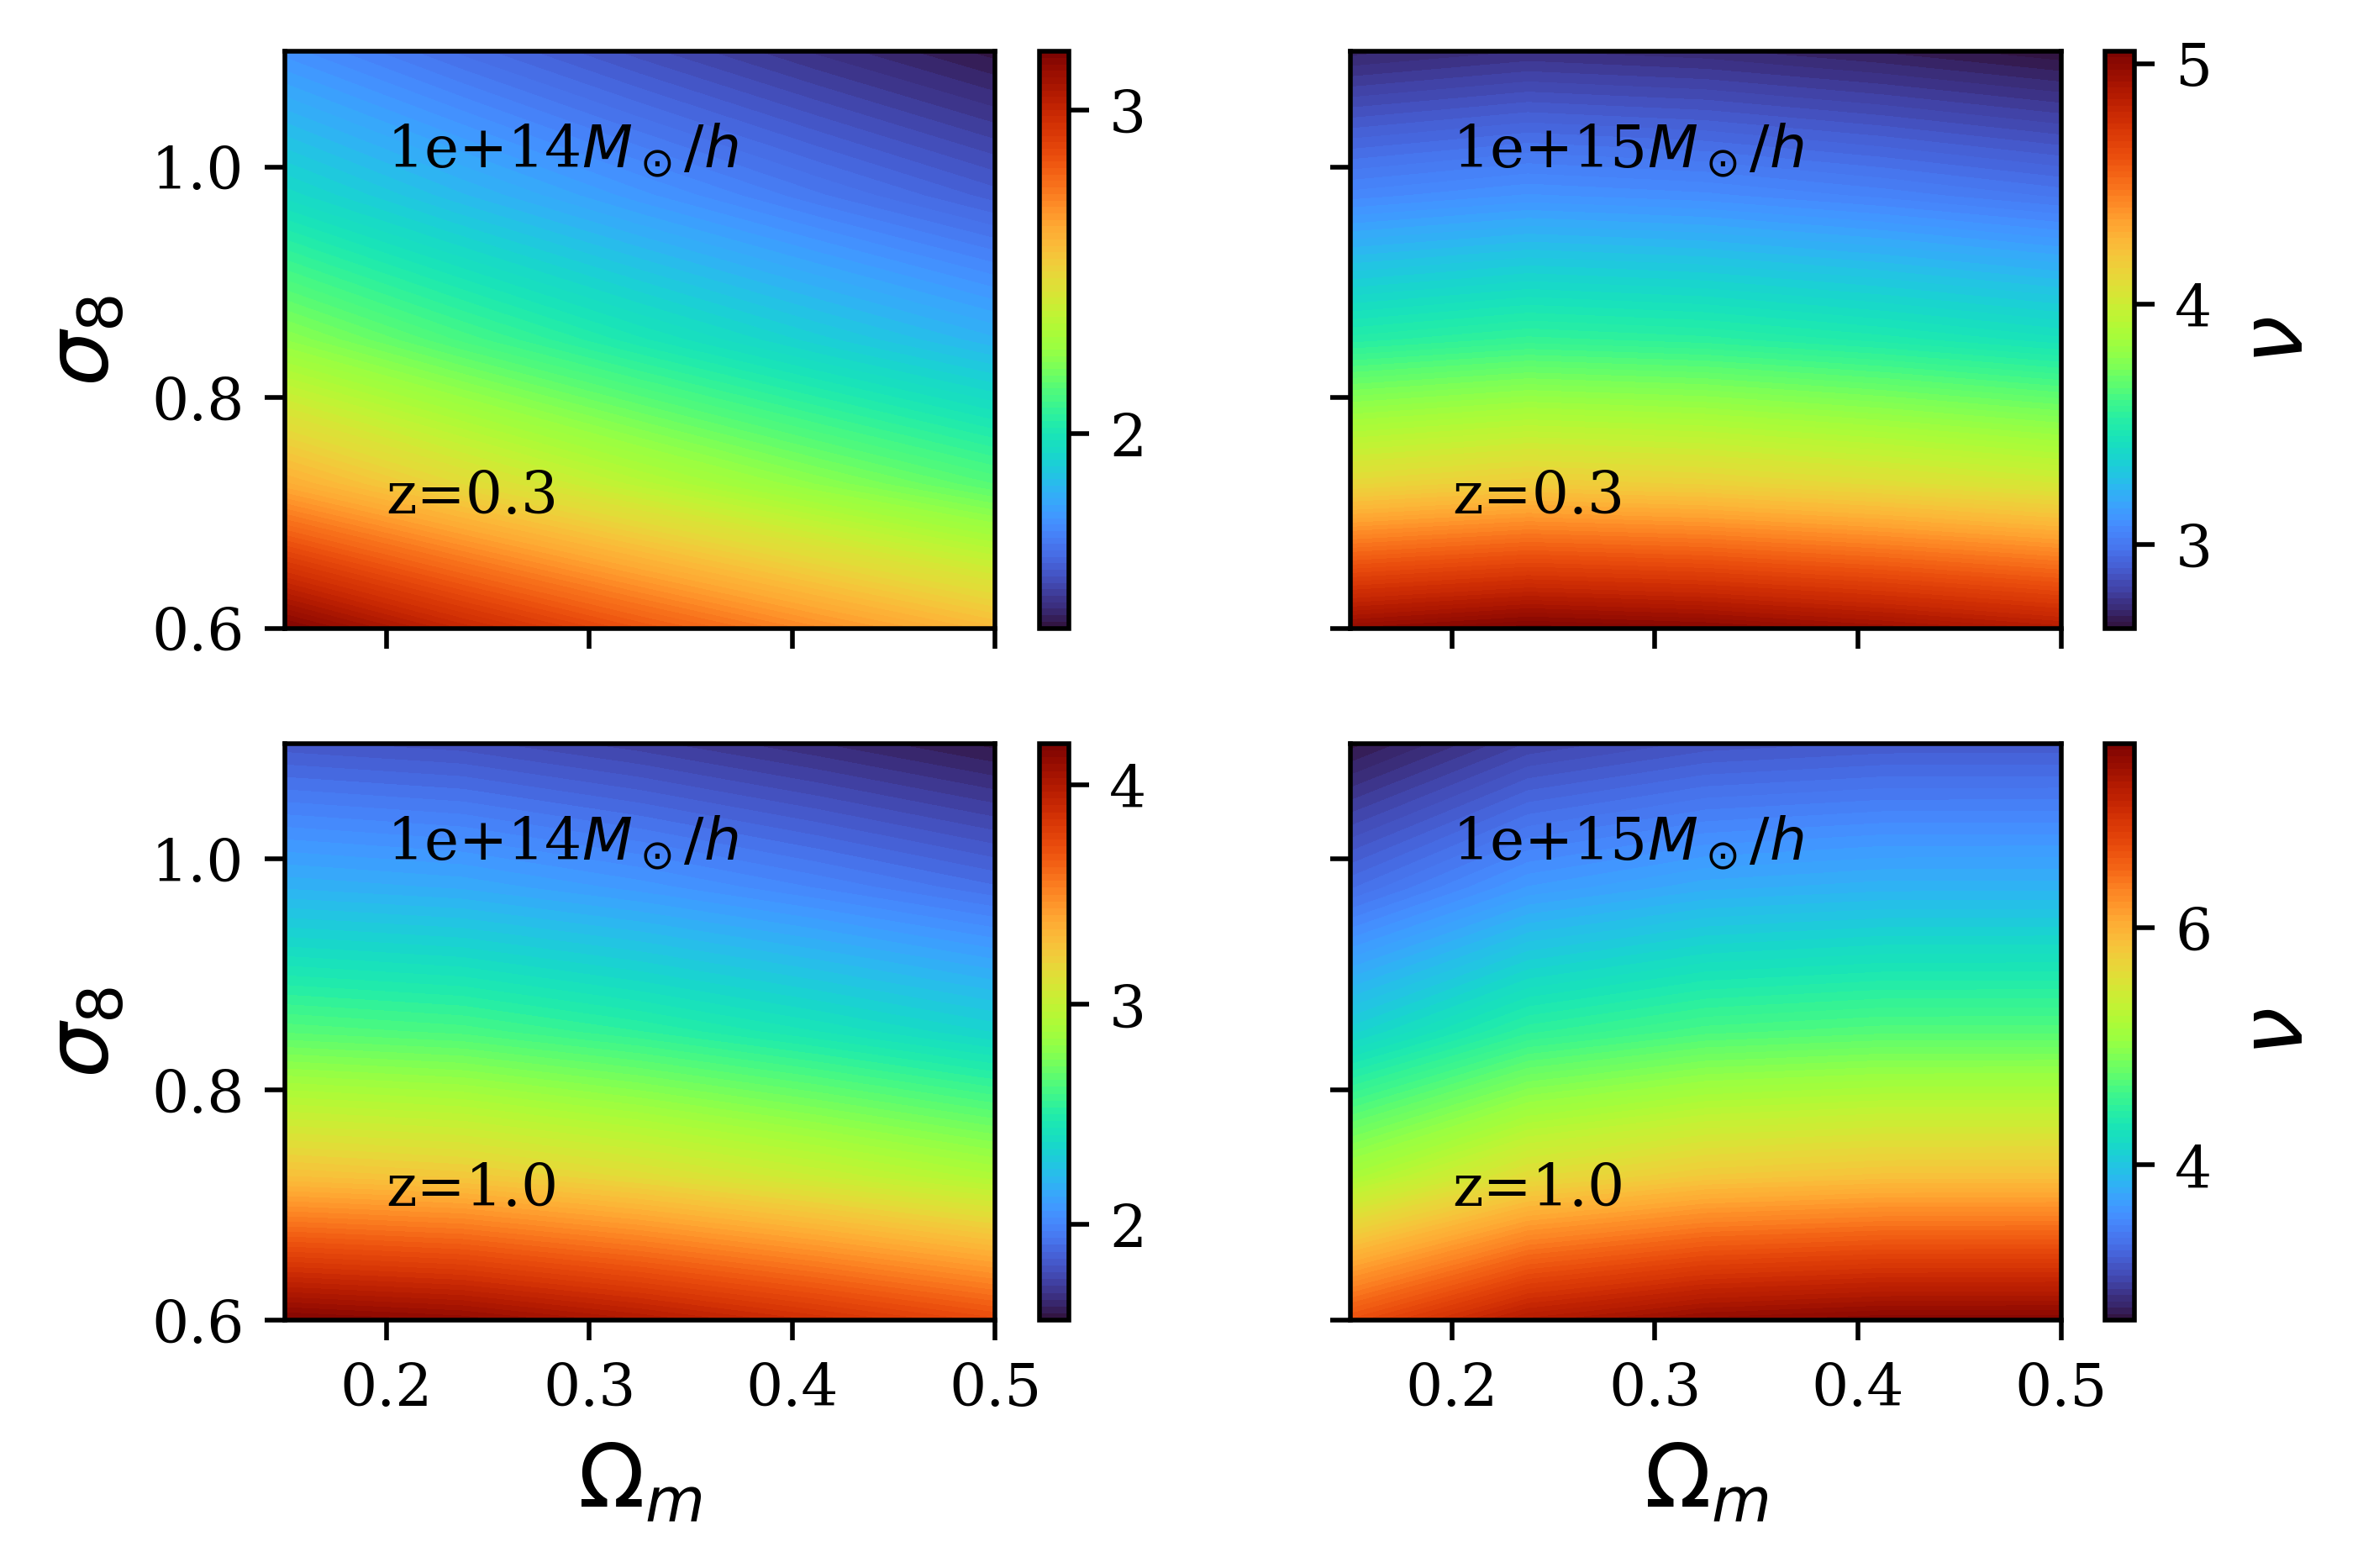

In [29]:
masses = [1e14, 1e15]
onepluszs = [1.3, 2]
size = 5

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([omv]*size).transpose()
y = np.array([sig8]*size)
olv = 1 - omv
angle = (1000*np.pi/180)**2
nom = np.zeros((size, size))
fig, axs = plt.subplots(2, 2, dpi=500, sharex=True, sharey=True)

levels=100

for k in range(len(onepluszs)):
    el = onepluszs[k]
    for l in range(len(masses)):
        mt = masses[l]
        for i in range(size):
            for j in range(size):
                nom[i,j] = hmf.nu(mt, z=el-1, sig8=sig8[j], om0=omv[i], ol0=olv[i], Colos=False)
        ax = axs[k,l]
        im = ax.contourf(x, y, nom, levels=levels, cmap='turbo')
        cbar = fig.colorbar(im, ax=ax)
        tick_locator = ticker.MaxNLocator(nbins=3)
        cbar.locator = tick_locator
        cbar.update_ticks()
        cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])
        ax.annotate('{:2.1}$M_\odot/h$'.format(masses[l]), (0.2, 1))
        ax.annotate('z={:2.1f}'.format(onepluszs[k]-1), (0.2, 0.7))
        if k+l==0:
            tick_locator = ticker.MaxNLocator(nbins=2)
            cbar.locator = tick_locator
            cbar.update_ticks()
            cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])
        else:
            tick_locator = ticker.MaxNLocator(nbins=3)
            cbar.locator = tick_locator
            cbar.update_ticks()
            cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])
        if l == 0:
            ax.set_ylabel('$\sigma_8$', size=15)
        else:
            cbar.set_label(r'$\nu$', weight='bold',size=15)
        if k == 1:
            ax.set_xlabel('$\Omega_m$', size=15)
        
plt.savefig('./figs/om_s8_nu.pdf',bbox_inches ='tight', dpi=300)
plt.savefig('./figs/om_s8_nu.png',bbox_inches ='tight', dpi=300)

plt.show()

# Collapsed fraction vs cosmology 

/tmp/ipykernel_9654/1749434872.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])
/tmp/ipykernel_9654/1749434872.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])


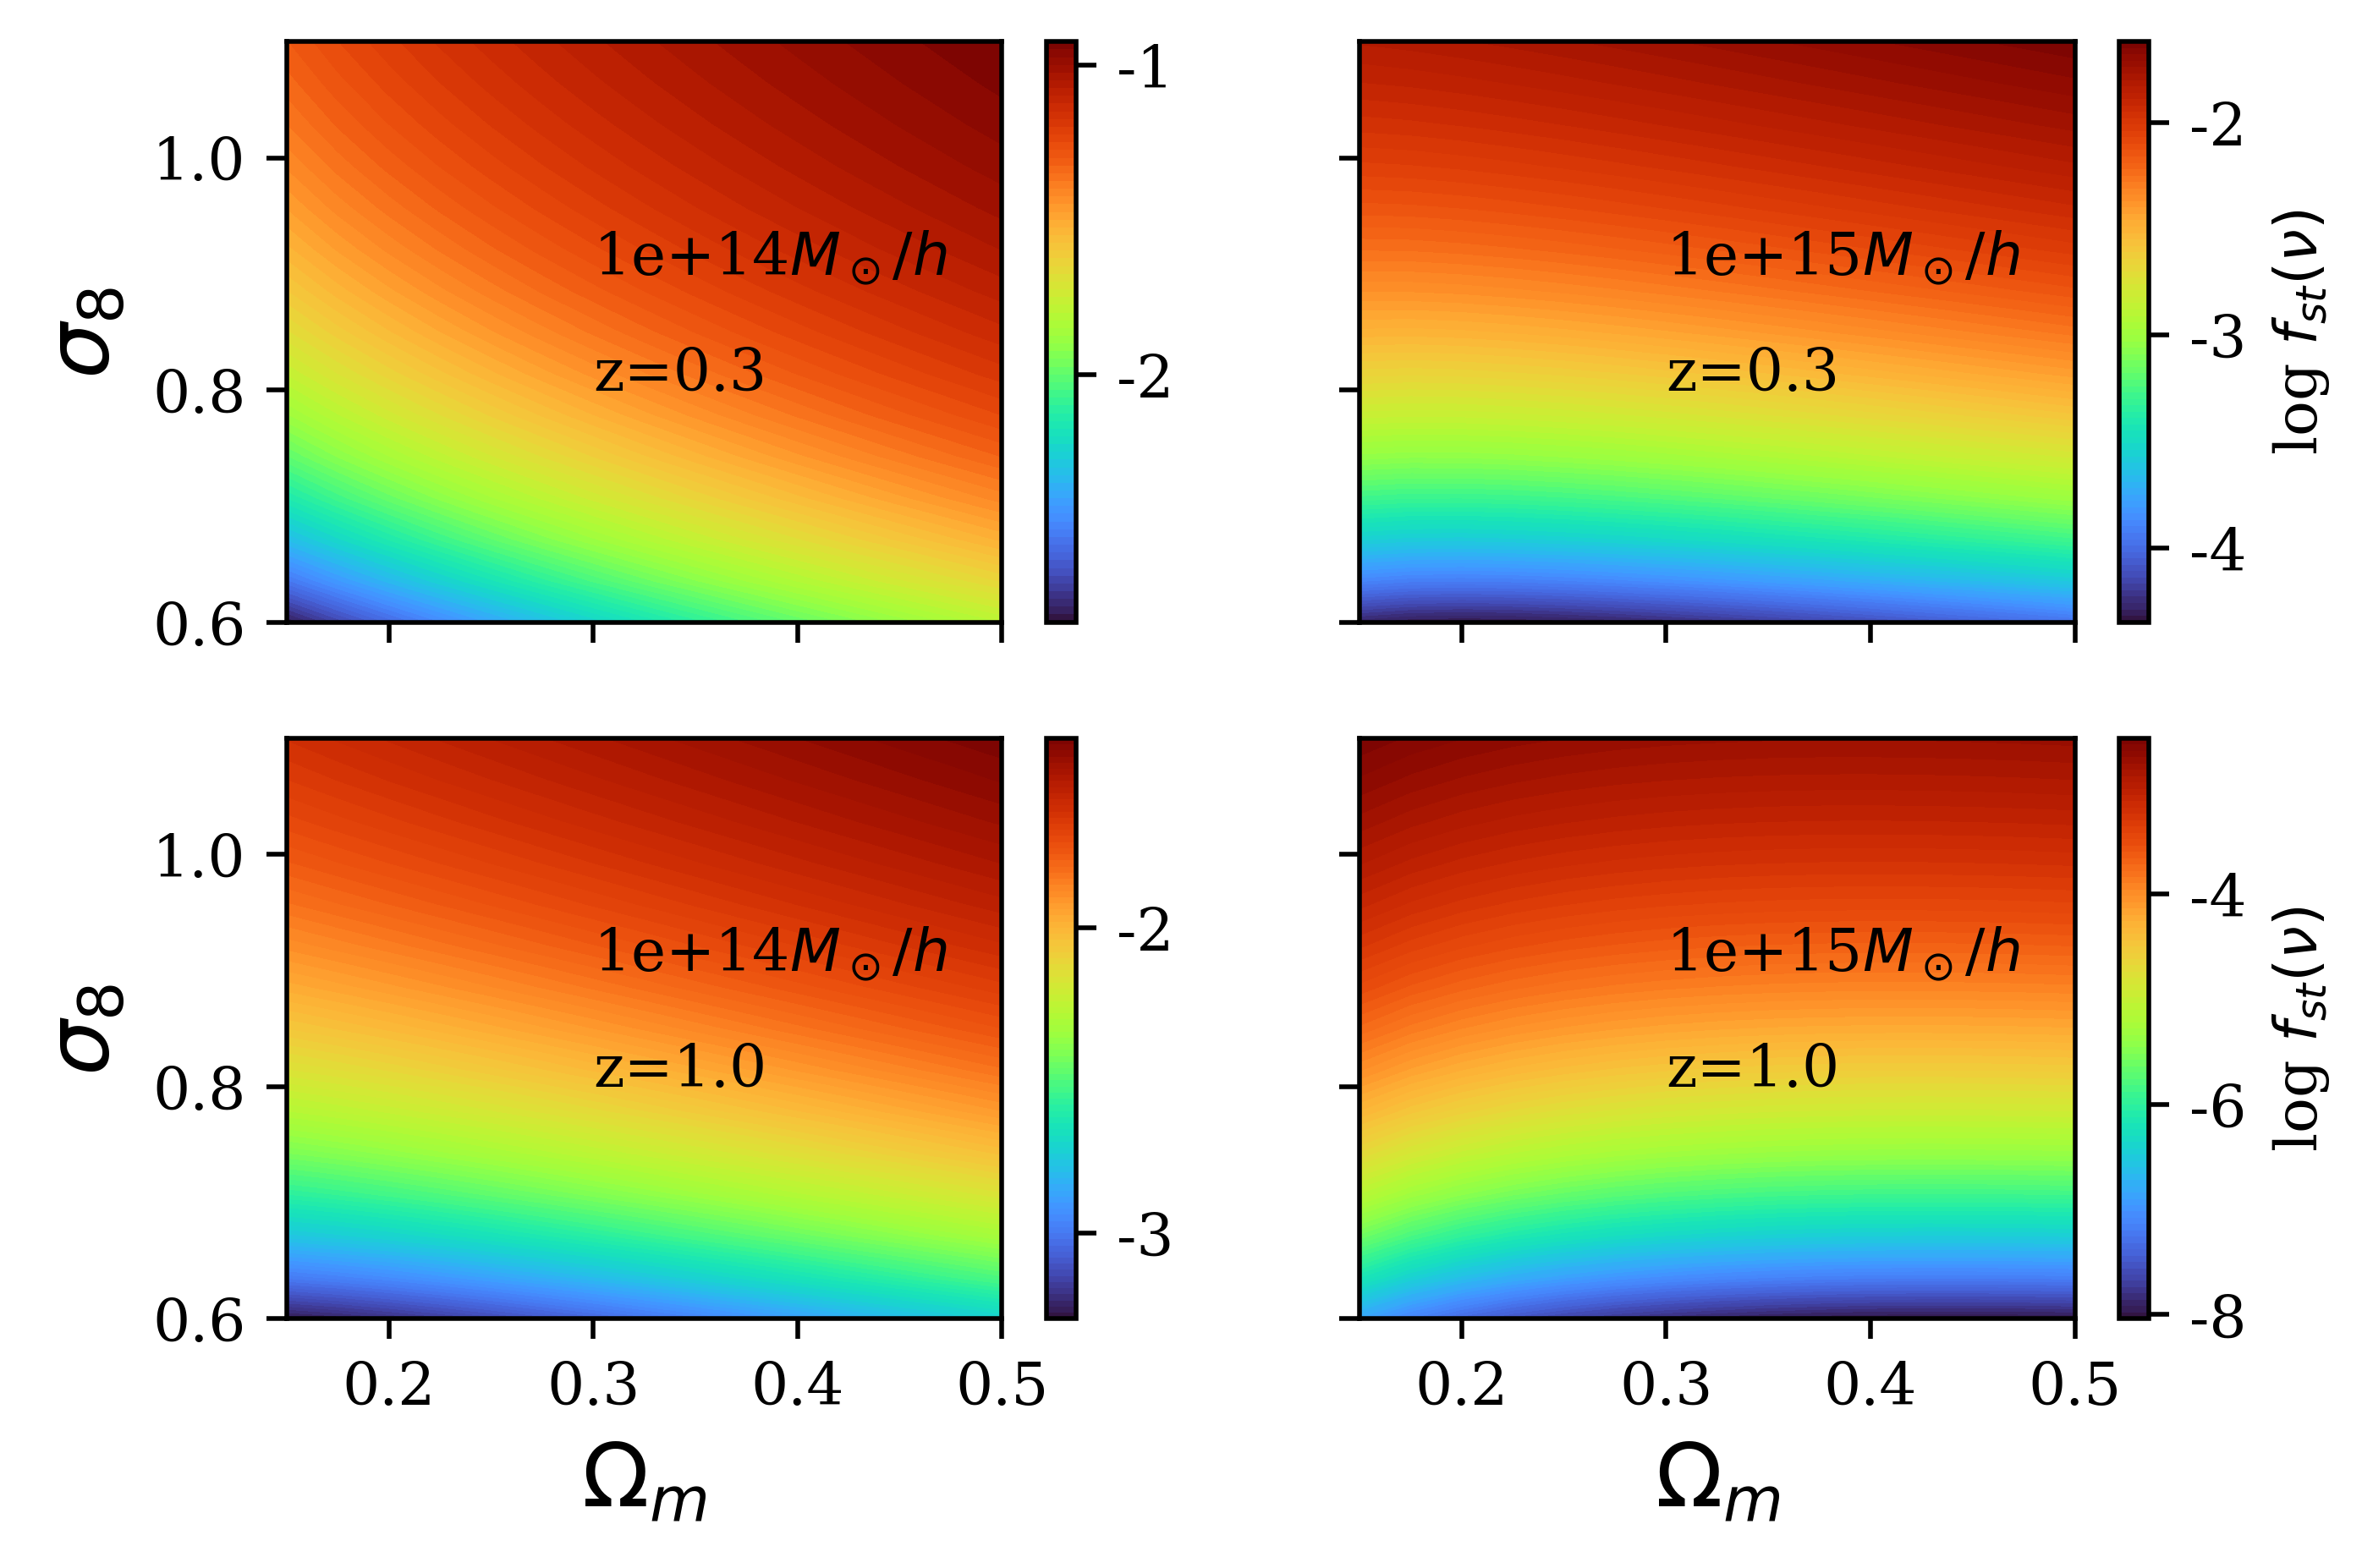

In [30]:
masses = [1e14, 1e15]
onepluszs = [1.3, 2]
size = 15

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([omv]*size).transpose()
y = np.array([sig8]*size)
olv = 1 - omv
angle = (1000*np.pi/180)**2
nom = np.zeros((size, size))
levels = 100
fig, axs = plt.subplots(2, 2, dpi=500, sharex=True, sharey=True)

for k in range(len(onepluszs)):
    el = onepluszs[k]
    for l in range(len(masses)):
        mt = masses[l]
        for i in range(size):
            for j in range(size):
                nom[i,j] = np.log10(hmf(mt, z=el-1, sig8=sig8[j], om0=omv[i], ol0=olv[i],
                                    kmax=5, prec=100, camb=False, model='sheth', out='dimensionless'))
        ax = axs[k,l]
        im = ax.contourf(x, y, nom, levels=100, cmap='turbo')
        #ax.annotate(r'$\nu$ = {:2.1f}'.format(nu(mt, el-1)), (0.2, 0.8))
        ax.annotate('{:2.1}$M_\odot/h$'.format(masses[l]), (0.3, 0.9))
        ax.annotate('z={:2.1f}'.format(onepluszs[k]-1), (0.3, 0.8))
        cbar = fig.colorbar(im, ax=ax)
        if l == 0:
            ax.set_ylabel('$\sigma_8$', size=15)
            tick_locator = ticker.MaxNLocator(nbins=2)
            cbar.locator = tick_locator
            cbar.update_ticks()
            cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])
        else:
            tick_locator = ticker.MaxNLocator(nbins=3)
            cbar.locator = tick_locator
            cbar.update_ticks()
            cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])
            cbar.set_label(r'log $f_{st}(\nu)$') #, weight='bold')
        if k == 1:
            ax.set_xlabel('$\Omega_m$', size=15)

plt.savefig('./figs/sheth_om_s8_fnu.pdf',bbox_inches ='tight', dpi=300)
plt.savefig('./figs/sheth_om_s8_fnu.png',bbox_inches ='tight', dpi=300)

plt.show()

# Halo Mass Function 

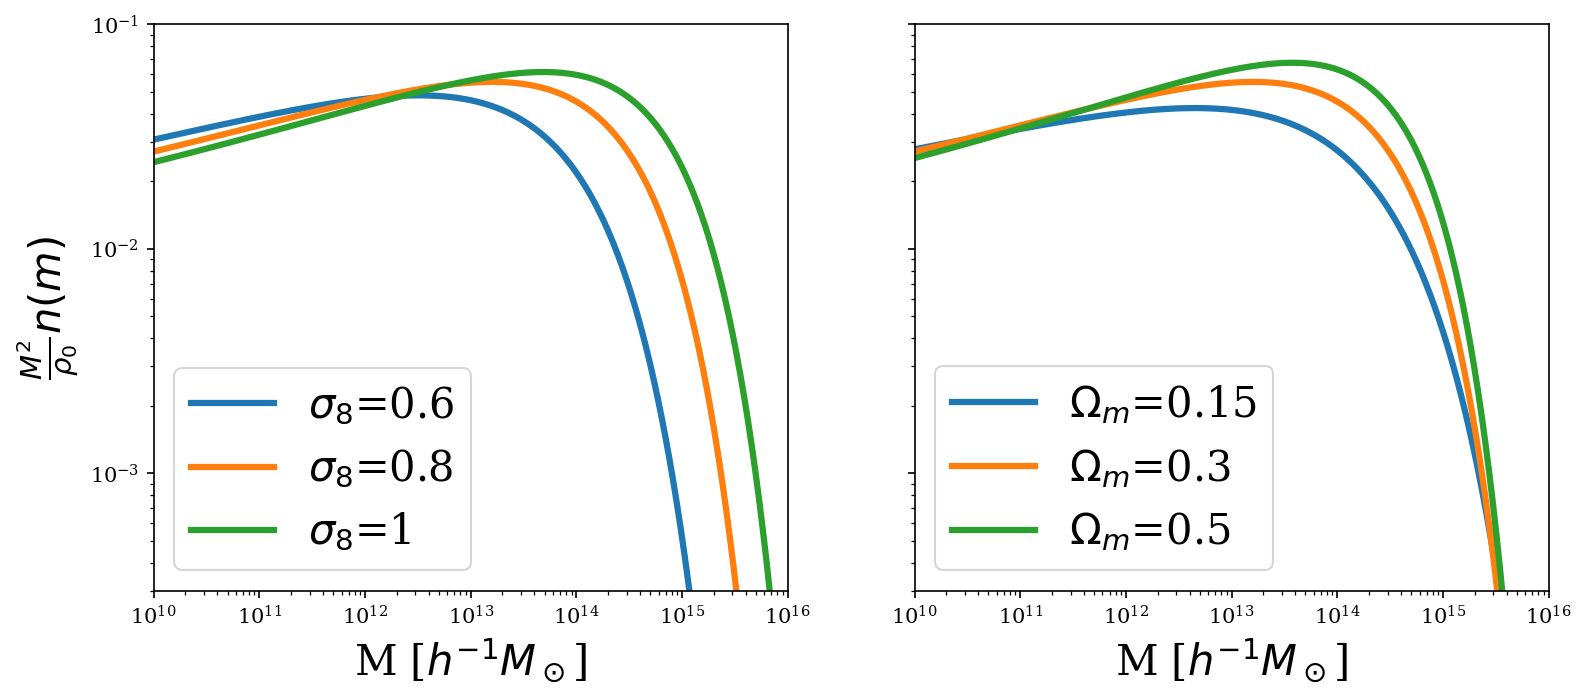

In [37]:
fig, axs = plt.subplots(1,2, figsize=[12,5], sharey=True, sharex=True)

masses = np.logspace(10, 16, 1000)
sig8 = [0.6, 0.8, 1]
omv = [0.15, 0.3, 0.5]
for j in range(3):
    res1 = hmf(masses, z=0, sig8=sig8[j], om0=0.3, ol0=0.7, kmax=5, prec=100, camb=False, model='sheth', out='dimensionless')
    res2 = hmf(masses, z=0, sig8=0.8, om0=omv[j], ol0=1-omv[j], kmax=5, prec=100, camb=False, model='sheth', out='dimensionless')

    axs[0].loglog(masses[1:-1], res1, label='$\sigma_8$='+str(sig8[j]), linewidth=3)
    axs[1].loglog(masses[1:-1], res2, label='$\Omega_m$='+str(omv[j]), linewidth=3)
for i in range(2):
    axs[i].set_xlabel('M [$h^{-1}M_\odot$]', size=20)
    axs[i].legend(fontsize=20)
axs[0].set_ylabel(r'$\frac{M^2}{\rho_0} n(m)$', size=20)
plt.xlim(1e10, 1e16)
plt.ylim(3e-4, 0.1)

plt.savefig('./figs/hmf_dimensionless_s8_omv_mass.pdf', dpi=300, bbox_inches='tight')
plt.savefig('./figs/hmf_dimensionless_s8_omv_mass.png', dpi=300, bbox_inches='tight')


/tmp/ipykernel_9654/3602797238.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])


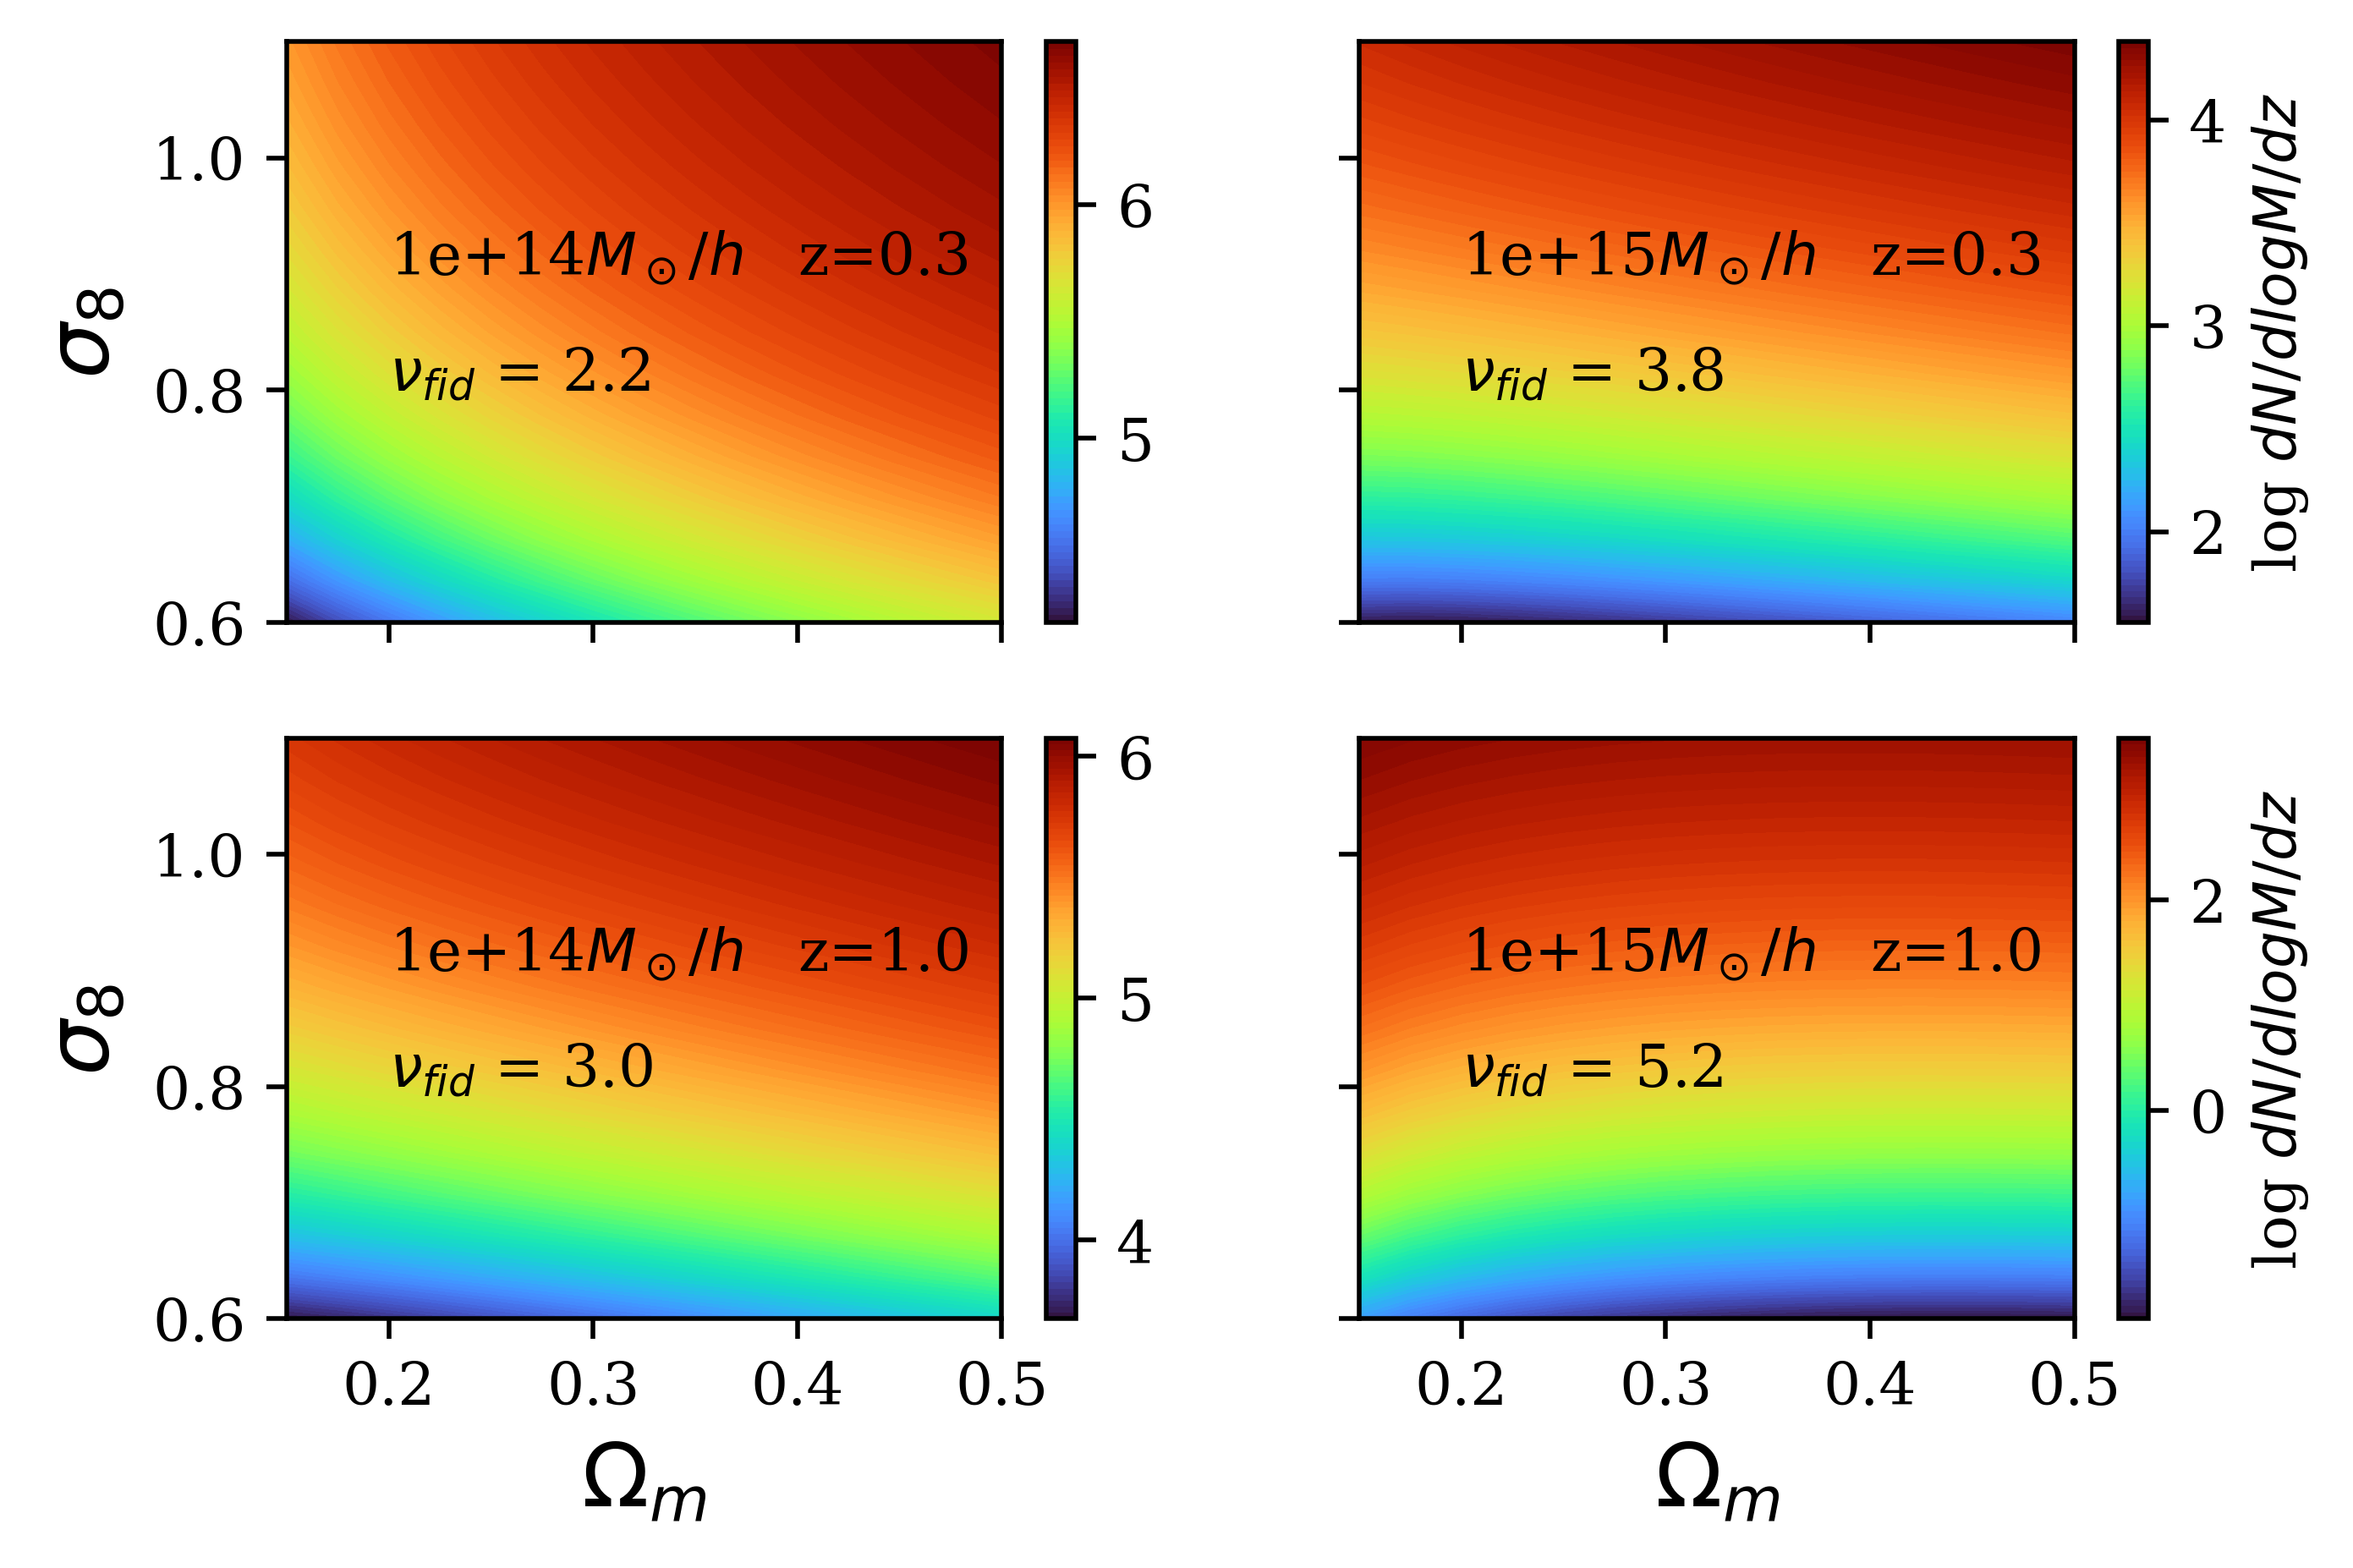

In [38]:
masses = [1e14, 1e15]
onepluszs = [1.3, 2]
size = 15

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([omv]*size).transpose()
y = np.array([sig8]*size)
olv = 1 - omv

nom = np.zeros((size, size))
fig, axs = plt.subplots(2, 2, dpi=500, sharex=True, sharey=True)
levels=np.linspace(-1.9, 5.9, 1000)

for k in range(len(onepluszs)):
    el = onepluszs[k]
    for l in range(len(masses)):
        mt = masses[l]
        for i in range(size):
            for j in range(size):
                cosmo = LambdaCDM(H0=100*cp.h, Om0=omv[i], Ode0=1-omv[i], Ob0=cp.omb)
                rho_z = (cp.rho_c*cp.h**2)*omv[i]*(1+el-1)**3
                vol = cosmo.differential_comoving_volume(el).value*cp.h**3
                nom[i,j] = np.log10(vol*hmf(mt, z=el-1, sig8=sig8[j], om0=omv[i], ol0=olv[i],
                                                    kmax=5, prec=100, camb=False, model='sheth', out='dndlnM'))
                #nom[i,j] = hmf(mt, z=el-1, sig8=sig8[j], om0=omv[i], ol0=olv[i],
                                                     #kmax=5, prec=100, camb=False, model='sheth', out='dimensionless')
        ax = axs[k,l]
        im = ax.contourf(x, y, nom, levels=100, cmap='turbo')
        ax.annotate(r'$\nu_{{fid}}$ = {:2.1f}'.format(hmf.nu(mt, el-1)), (0.2, 0.8))
        ax.annotate('{:2.1}$M_\odot/h$'.format(masses[l]), (0.2, 0.9))
        ax.annotate('z={:2.1f}'.format(onepluszs[k]-1), (0.4, 0.9))
        
        cbar = fig.colorbar(im, ax=ax)
        tick_locator = ticker.MaxNLocator(nbins=3)
        cbar.locator = tick_locator
        cbar.update_ticks()
        cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])
        if l == 0:
            ax.set_ylabel('$\sigma_8$', size=15)
        else:
            cbar.set_label(r'log $dN/dlogM/dz$')
        if k == 1:
            ax.set_xlabel('$\Omega_m$', size=15)
        
plt.savefig('./figs/sheth_om_s8_diffncounts.pdf',bbox_inches ='tight', dpi=300, facecolor='white',transparent=False)
plt.savefig('./figs/sheth_om_s8_diffncounts.pdf',bbox_inches ='tight', dpi=300, facecolor='white',transparent=False)

plt.show()

In [ ]:
masses = [1e11, 1e12, 1e13]
onepluszs = [1.3, 2, 3, 4, 5, 7, 9, 10]
size = 15

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([omv]*size).transpose()
y = np.array([sig8]*size)
olv = 1 - omv

nom = np.zeros((size, size))

levels=np.linspace(-1.9, 5.9, 1000)

for k in range(len(onepluszs)):
    el = onepluszs[k]
    for l in range(len(masses)):
        mt = masses[l]
        
        for i in range(size):
            for j in range(size):
                nom[i,j] = np.log10(hmf(mt, z=el-1, sig8=sig8[j], om0=omv[i], ol0=olv[i],
                                    kmax=5, prec=100, camb=False, model='sheth', out='dndlnM'))
        fig, axs = plt.subplots(1, 1, dpi=500, sharex=True, sharey=True)
        im = axs.contourf(x, y, nom, levels=100, cmap='turbo')
        #axs.annotate(r'$\nu_{{fid}}$ = {:2.1f}'.format(nu(mt, el-1)), (0.2, 0.8), size=20)
        axs.annotate('{:2.1}$M_\odot/h$'.format(masses[l]), (0.2, 0.9), size=15)
        axs.annotate('z={:2.1f}'.format(onepluszs[k]-1), (0.4, 0.9), size=15)

        cbar = fig.colorbar(im, ax=axs)
        tick_locator = ticker.MaxNLocator(nbins=3)
        cbar.locator = tick_locator
        cbar.update_ticks()
        cbar.ax.set_yticklabels(["{:1.1f}".format(i) for i in cbar.get_ticks()])
        axs.set_ylabel('$\sigma_8$', size=15)
        cbar.set_label(r'log dn/dlogM', size=10)
        axs.set_xlabel('$\Omega_m$', size=15)
        
        #np.savetxt('./figs/sheth_om_s8_fst_z{:1.2f}_M{:1.2e}.txt'.format(el-1, mt), nom)
        plt.savefig('./figs/sheth_om_s8_fst_z{:1.2f}_M{:1.2e}.pdf'.format(el-1, mt),bbox_inches ='tight', dpi=300)
        plt.savefig('./figs/sheth_om_s8_fst_z{:1.2f}_M{:1.2e}.png'.format(el-1, mt),bbox_inches ='tight', dpi=300)
        
        plt.show()

### One plot, mass and redshift

/tmp/ipykernel_9654/4235595638.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])


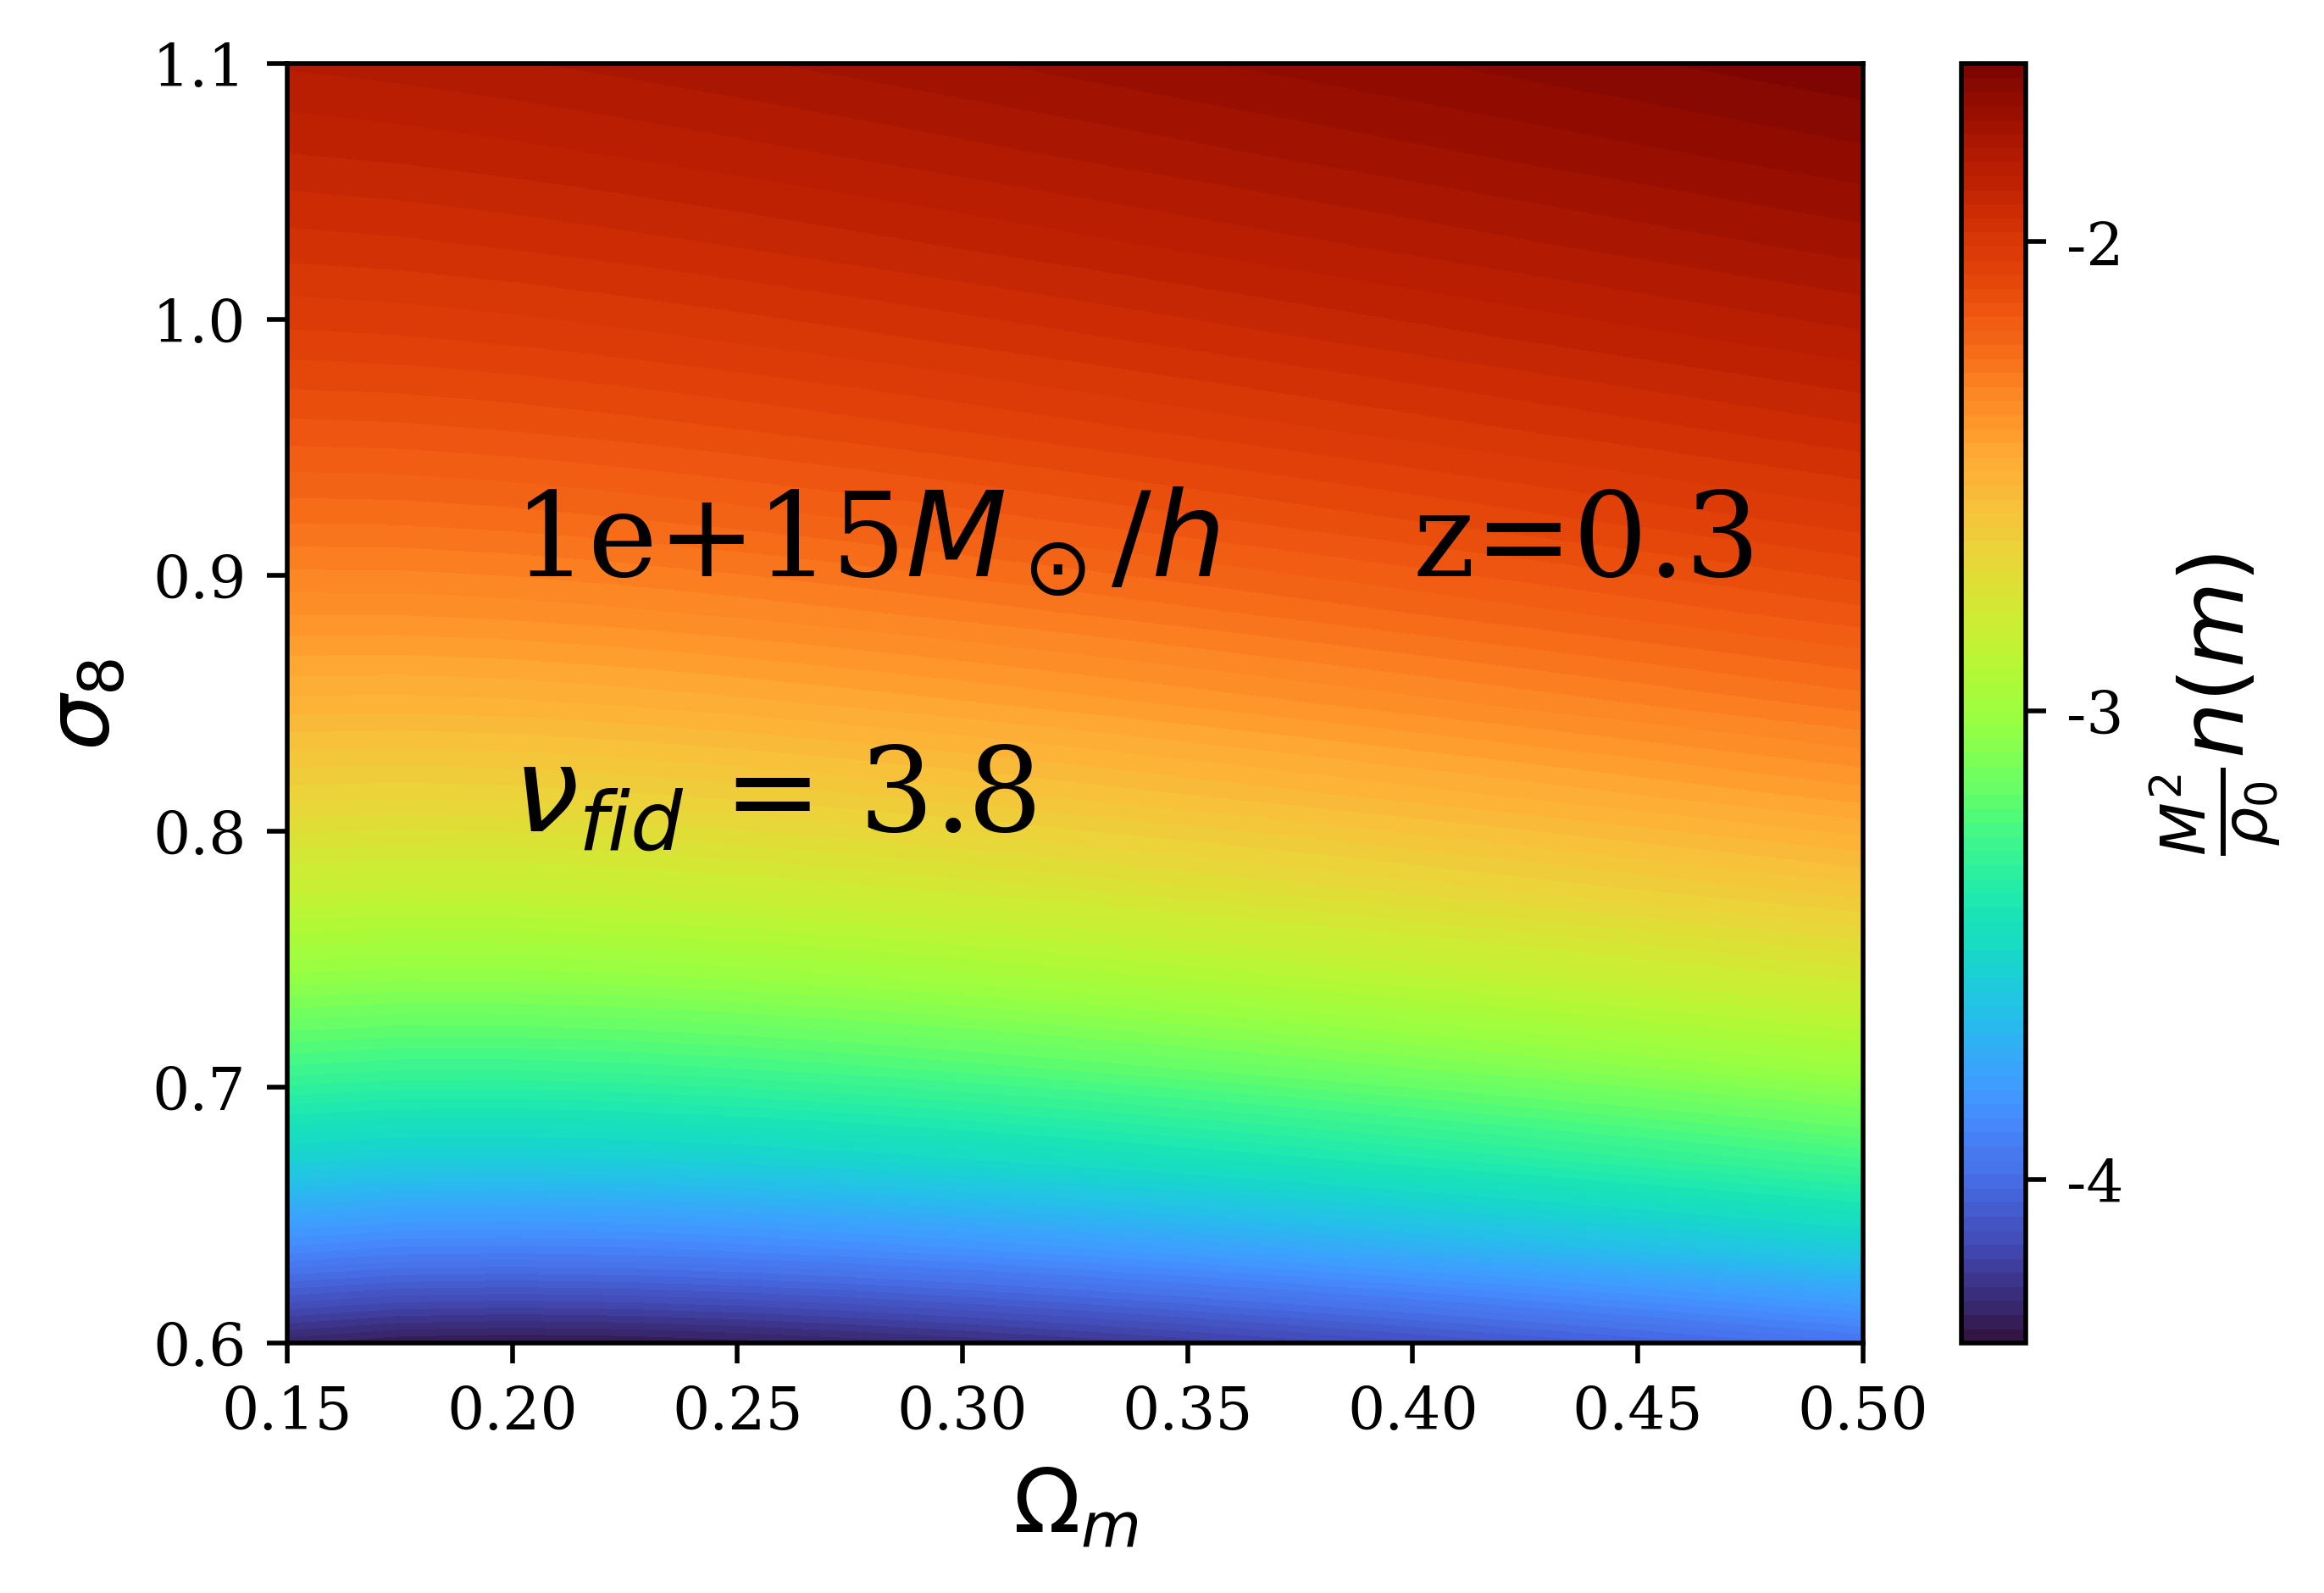

In [40]:
masses = [1e15]
onepluszs = [1.3]
size = 15


sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([omv]*size).transpose()
y = np.array([sig8]*size)
olv = 1 - omv

nom = np.zeros((size, size))
fig, axs = plt.subplots(1, 1, dpi=500, sharex=True, sharey=True)
levels=np.linspace(-1.9, 5.9, 1000)

for k in range(len(onepluszs)):
    el = onepluszs[k]
    for l in range(len(masses)):
        mt = masses[l]
        for i in range(size):
            for j in range(size):
                nom[i,j] = np.log10(hmf(mt, z=el-1, sig8=sig8[j], om0=omv[i], ol0=olv[i],
                                    kmax=5, prec=100, camb=False, model='sheth', out='dimensionless'))
        im = axs.contourf(x, y, nom, levels=100, cmap='turbo')
        axs.annotate(r'$\nu_{{fid}}$ = {:2.1f}'.format(hmf.nu(mt, el-1)), (0.2, 0.8), size=20)
        axs.annotate('{:2.1}$M_\odot/h$'.format(masses[l]), (0.2, 0.9), size=20)
        axs.annotate('z={:2.1f}'.format(onepluszs[k]-1), (0.4, 0.9), size=20)

        cbar = fig.colorbar(im, ax=axs)
        tick_locator = ticker.MaxNLocator(nbins=3)
        cbar.locator = tick_locator
        cbar.update_ticks()
        cbar.ax.set_yticklabels(["{:1.0f}".format(i) for i in cbar.get_ticks()])
        axs.set_ylabel('$\sigma_8$', size=15)
        cbar.set_label(r'$\frac{M^2}{\rho_0} n(m)$', size=15)
        #cbar.set_label(r'log $f_{ST}(\nu)$', size=15)
        #cbar.set_label(r'log $dN/dlogM/dz$', size=15)
        axs.set_xlabel('$\Omega_m$', size=15)

plt.savefig('./figs/sheth_om_s8_fst2.pdf',bbox_inches ='tight', dpi=300)
plt.savefig('./figs/sheth_om_s8_fst2.png',bbox_inches ='tight', dpi=300)

plt.show()

# As a function of mass and redshift z  

## Peak height $\nu$

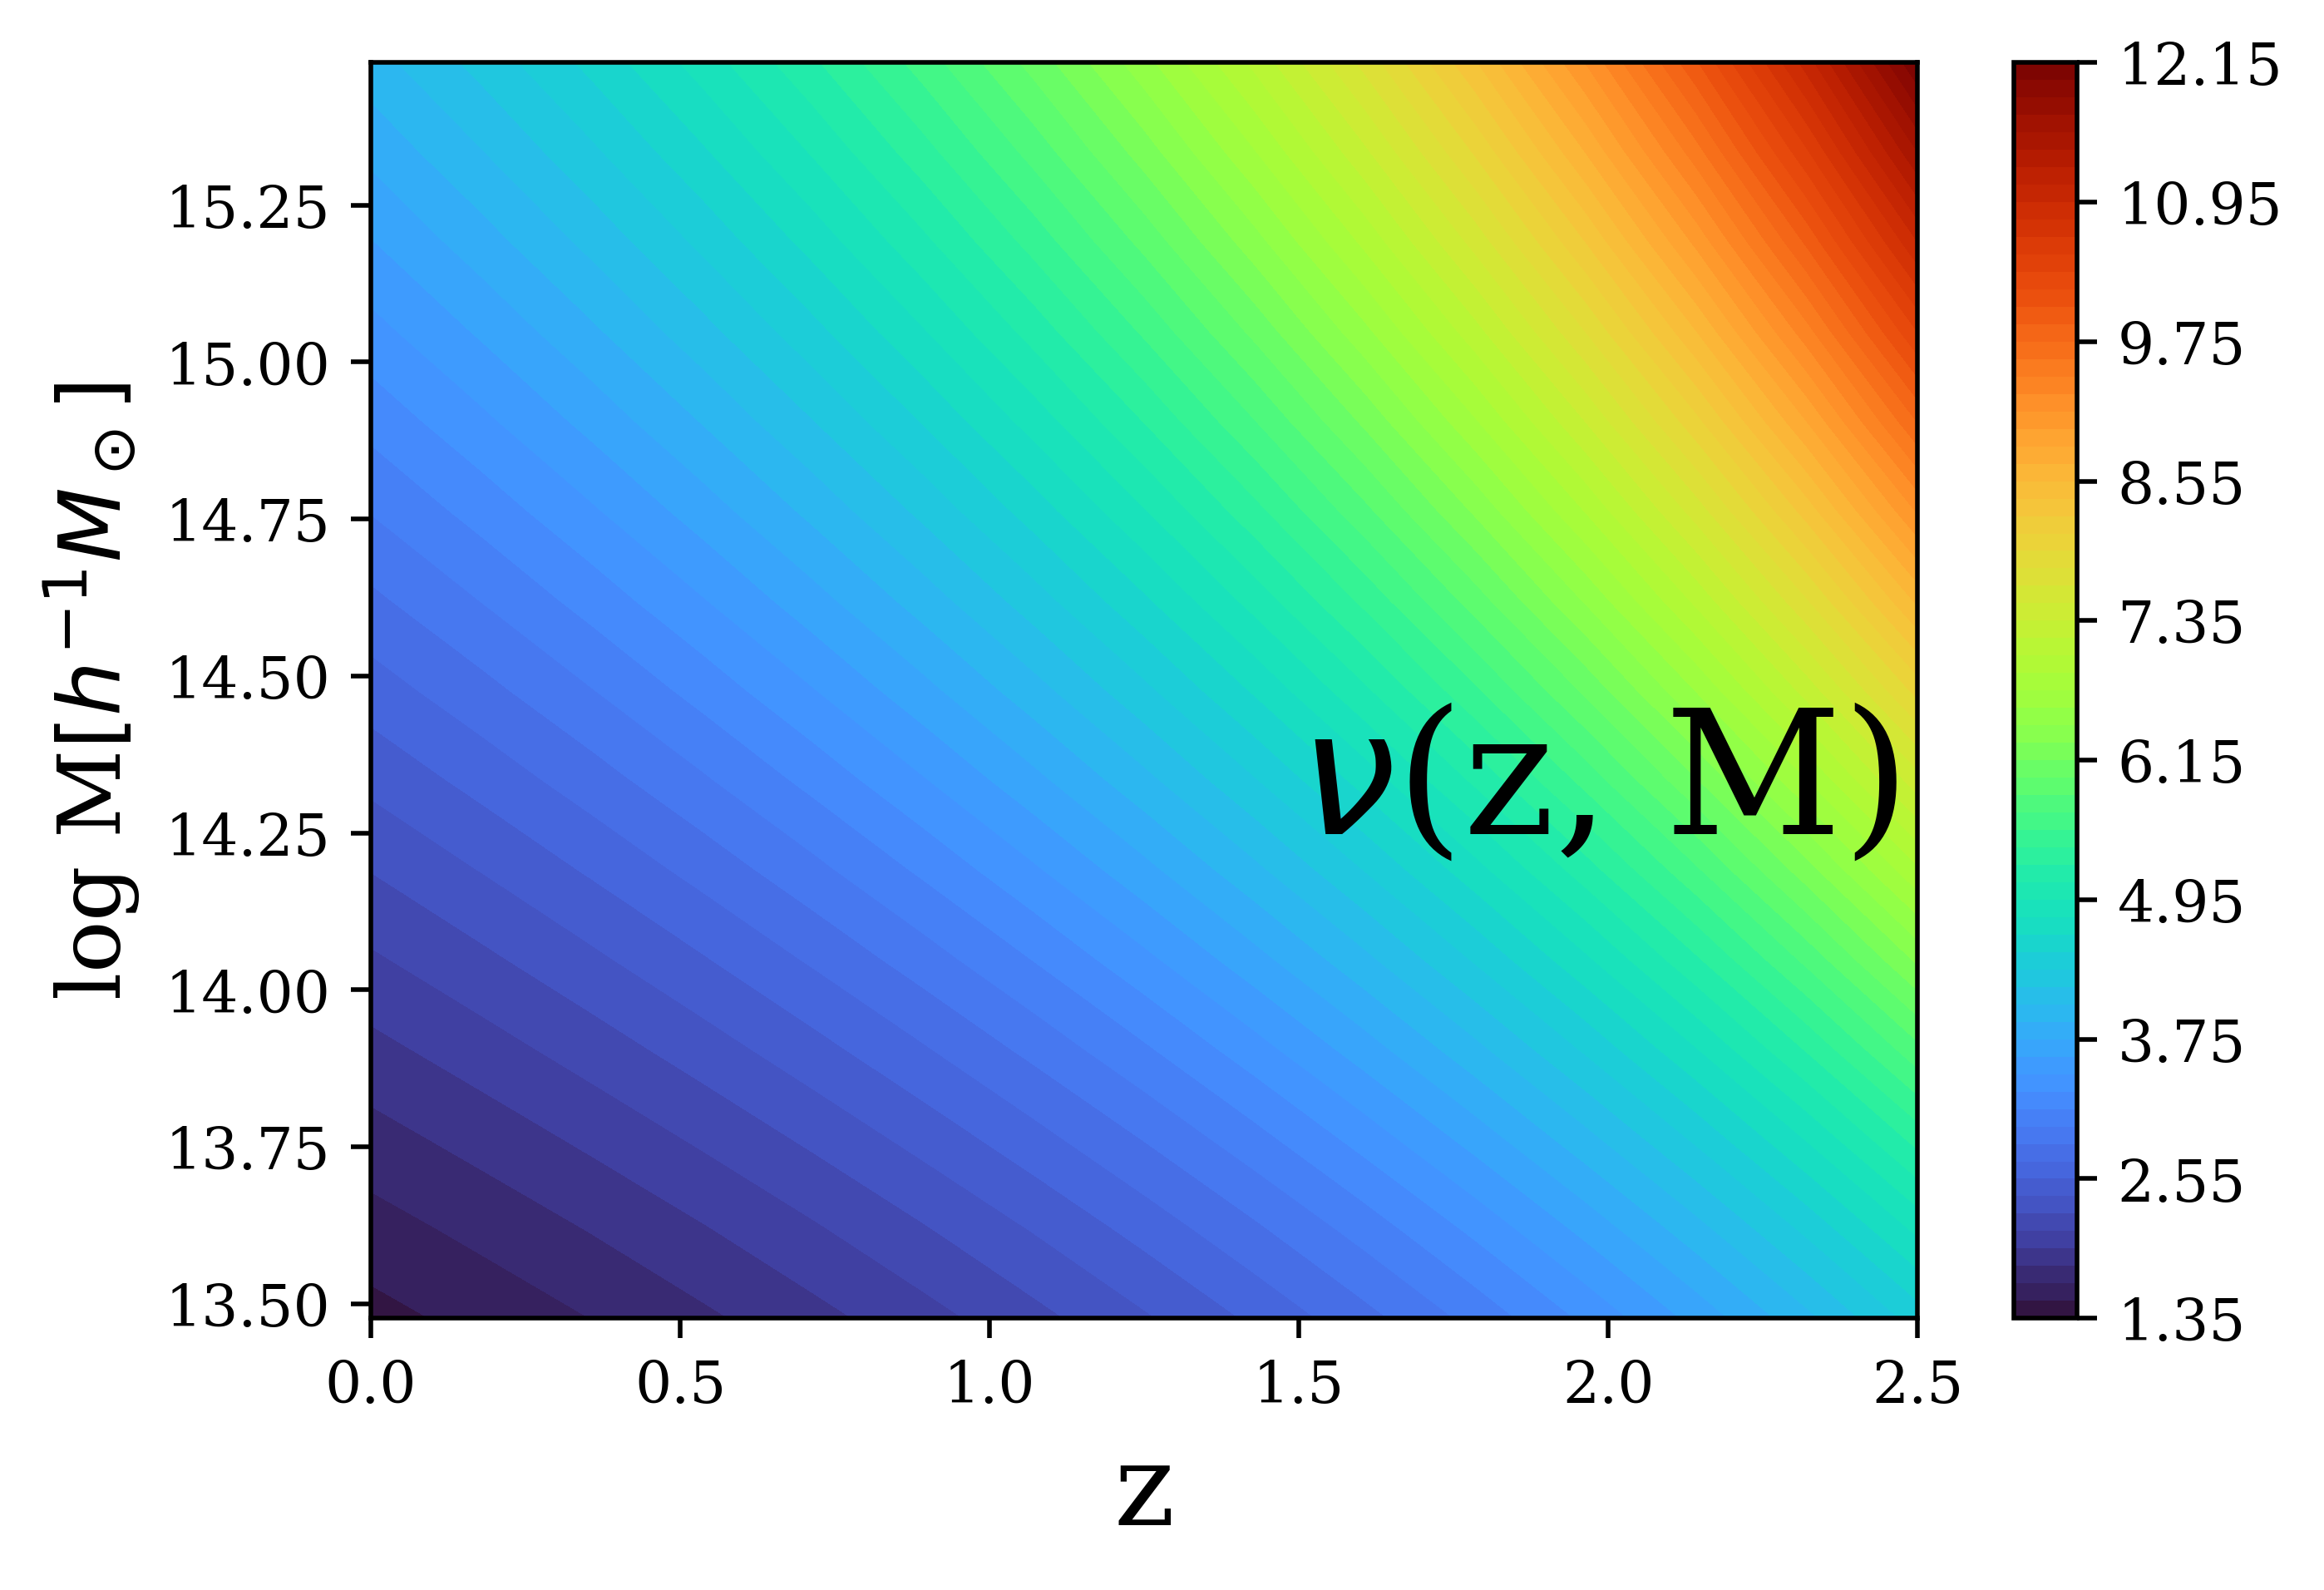

In [41]:
size = 15
masses = np.logspace(np.log10(3e13), np.log10(3e15), size)
onepluszs = np.linspace(1, 3.5, size)

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([masses]*size).transpose()
y = np.array([onepluszs]*size) -1
olv = 1 - omv
nom = np.zeros((size, size))
fig, axs = plt.subplots(1, 1, dpi=500)

for k in range(len(onepluszs)):
    el = onepluszs[k]
    for l in range(len(masses)):
        mt = masses[l]
        nom[k,l] = hmf.nu(mt, z=el-1, sig8=0.8, om0=0.3, ol0=0.7, Colos=False)
ax = axs
im = ax.contourf(y, np.log10(x), nom, levels=100, cmap='turbo')

ax.annotate(r'$\nu$(z, M)', (1.5, 14.25), size=30)
ax.set(ylabel='log M$[h^{-1}M_\odot]$', xlabel='z')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(15)

cbar = fig.colorbar(im, ax=ax)

plt.savefig('./figs/z_m_nu.pdf', dpi=300, bbox_inches='tight')
plt.savefig('./figs/z_m_nu.png', dpi=300, bbox_inches='tight')

plt.show()

## Halo Mass Function

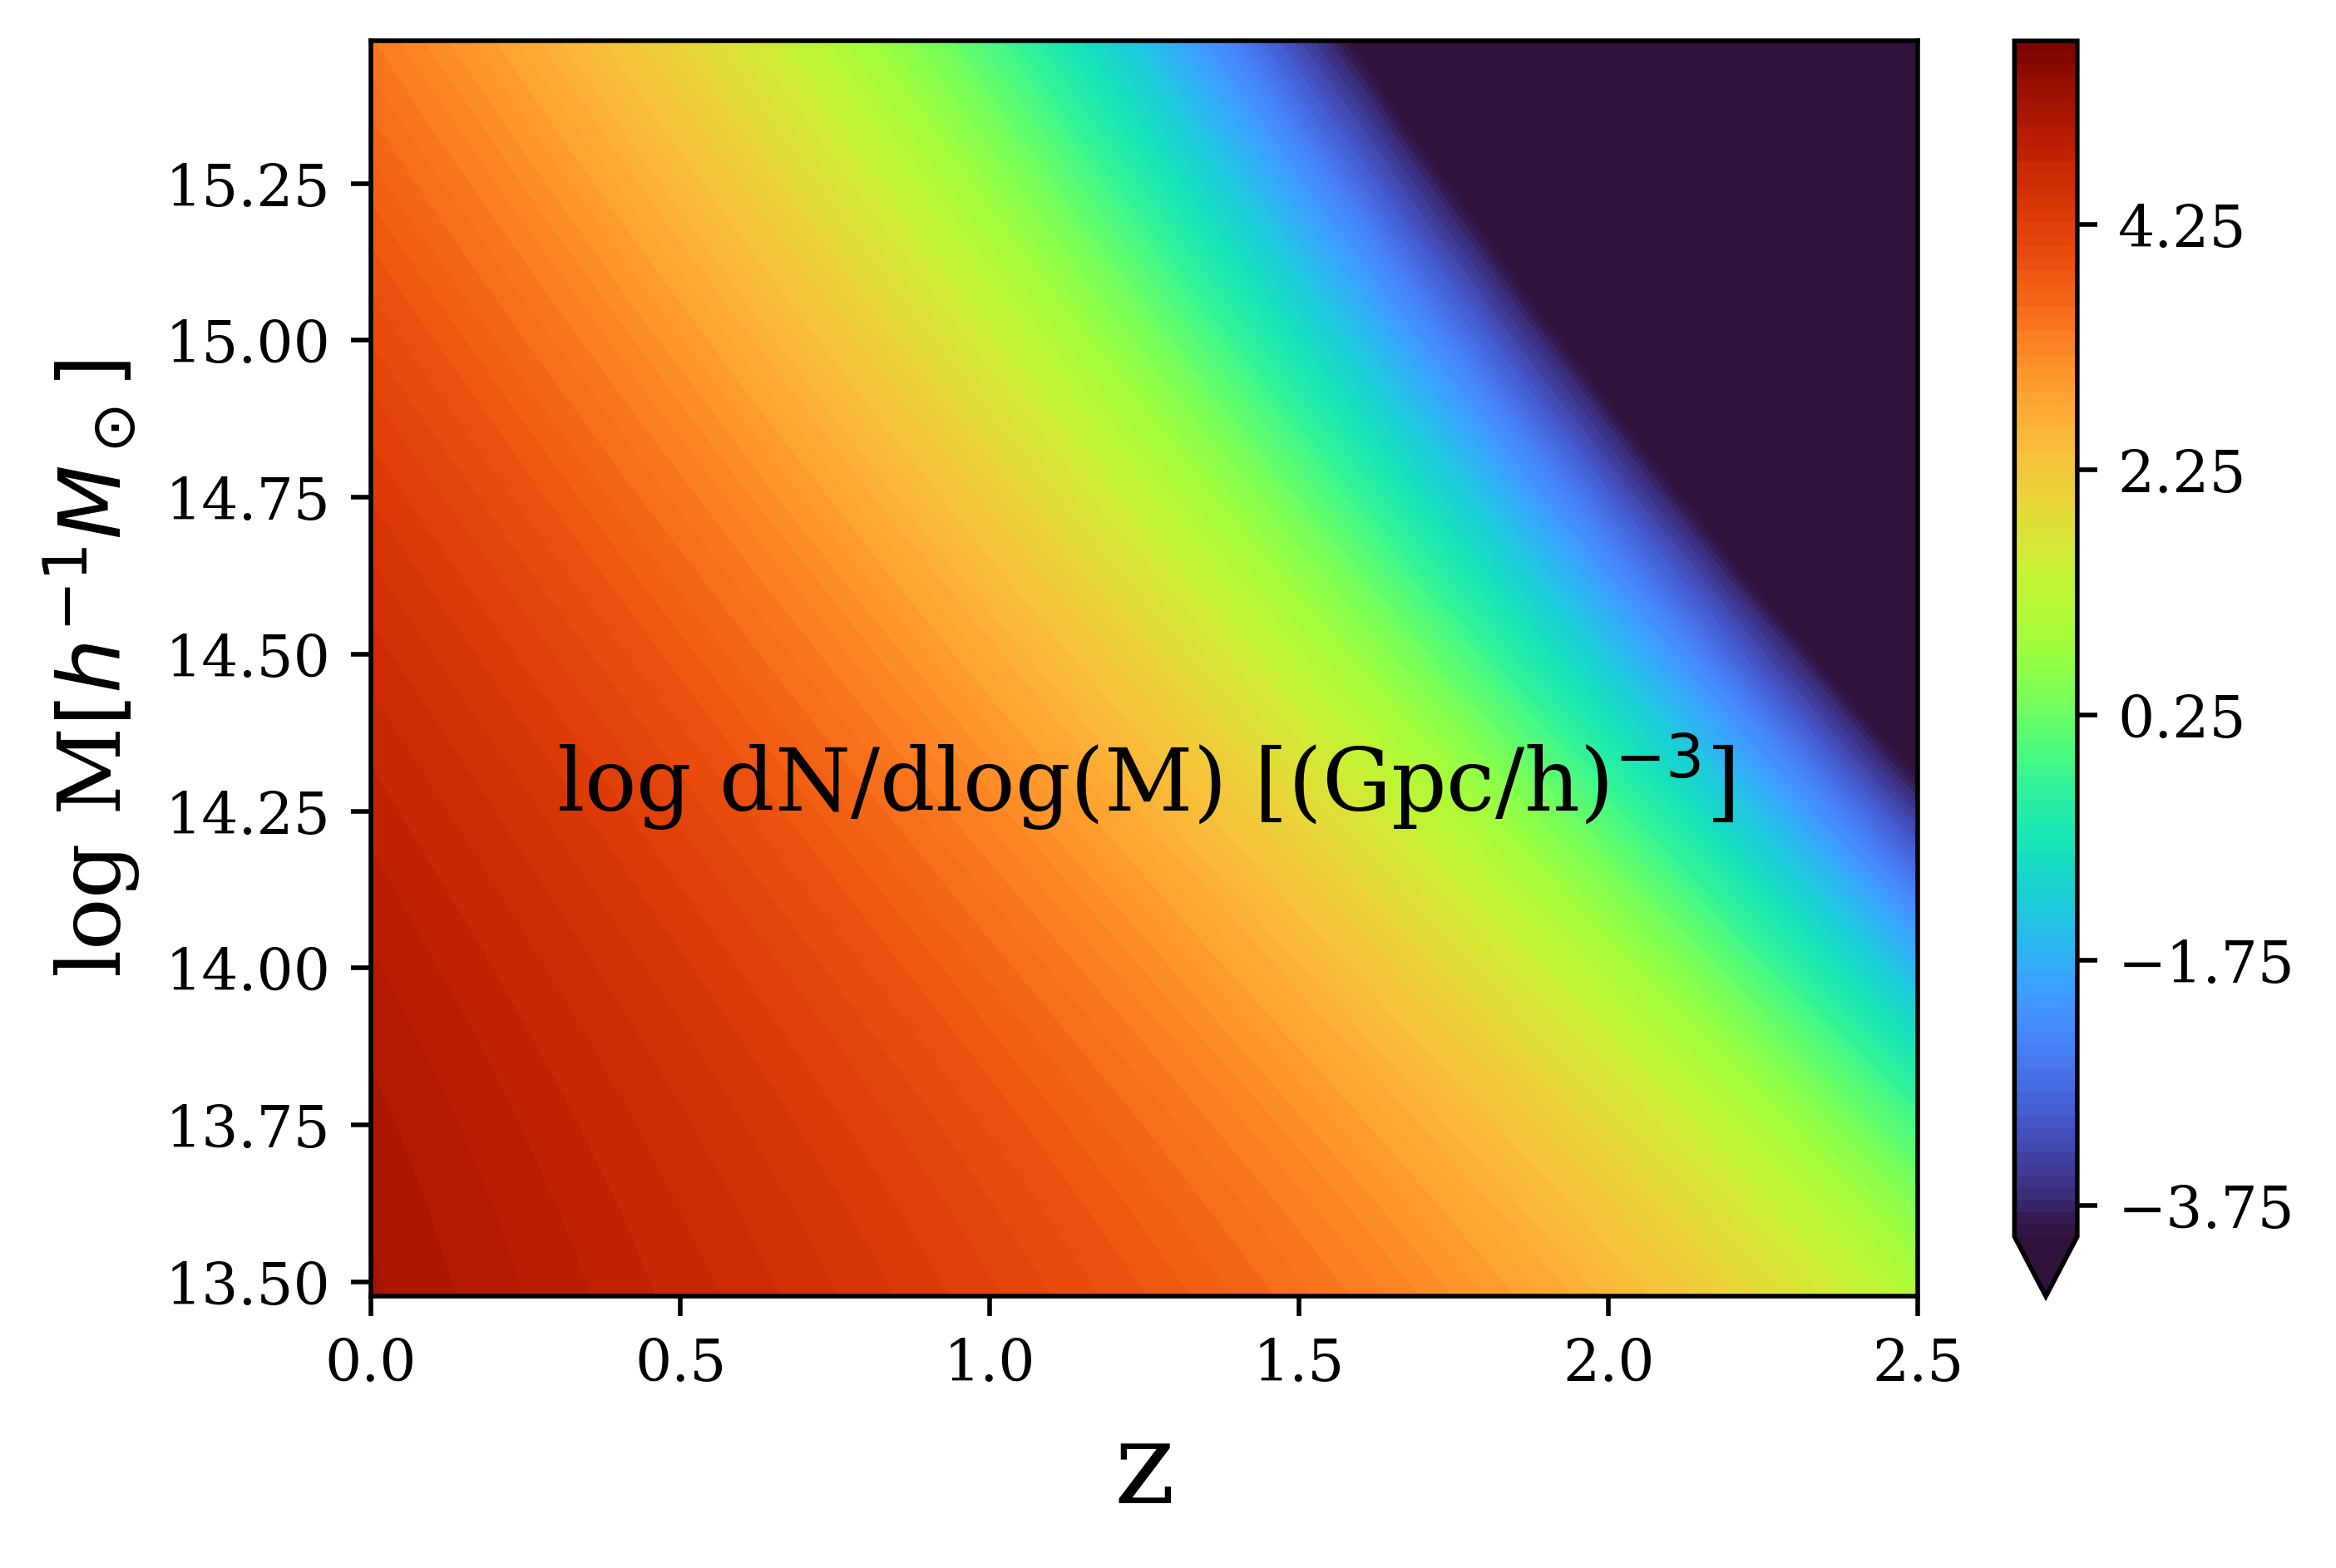

In [74]:

size = 15
masses = np.logspace(np.log10(3e13), np.log10(3e15), size)
onepluszs = np.linspace(1, 3.5, size)

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([masses]*size).transpose()
y = np.array([onepluszs]*size) -1
olv = 1 - omv
nom = np.zeros((size, size))
fig, axs = plt.subplots(1, 1, dpi=500)

for k in range(len(onepluszs)):
    el = onepluszs[k]
    for l in range(len(masses)):
        mt = masses[l]
        nom[k,l] = 9+np.log10(hmf(mt, z=el-1, sig8=0.8, om0=0.3, ol0=0.7, out='dndlnM'))
        #nom[nom<-13] = -13
ax = axs
im = ax.contourf(y, np.log10(x), nom, levels=np.linspace(-4, 5.75, 100), extend='min', cmap='turbo')

ax.annotate(r'log dN/dlog(M) [(Gpc/h)$^{-3}$]', (0.3, 14.25), size=15)
ax.set(ylabel='log M$[h^{-1}M_\odot]$', xlabel='z')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(15)


cbar = fig.colorbar(im, ax=ax, ticks = np.arange(-3.75, 5.75, 2))
plt.savefig('./figs/z_m_hmf.pdf', dpi=300, bbox_inches='tight')
plt.savefig('./figs/z_m_hmf.png', dpi=300, bbox_inches='tight')

plt.show()

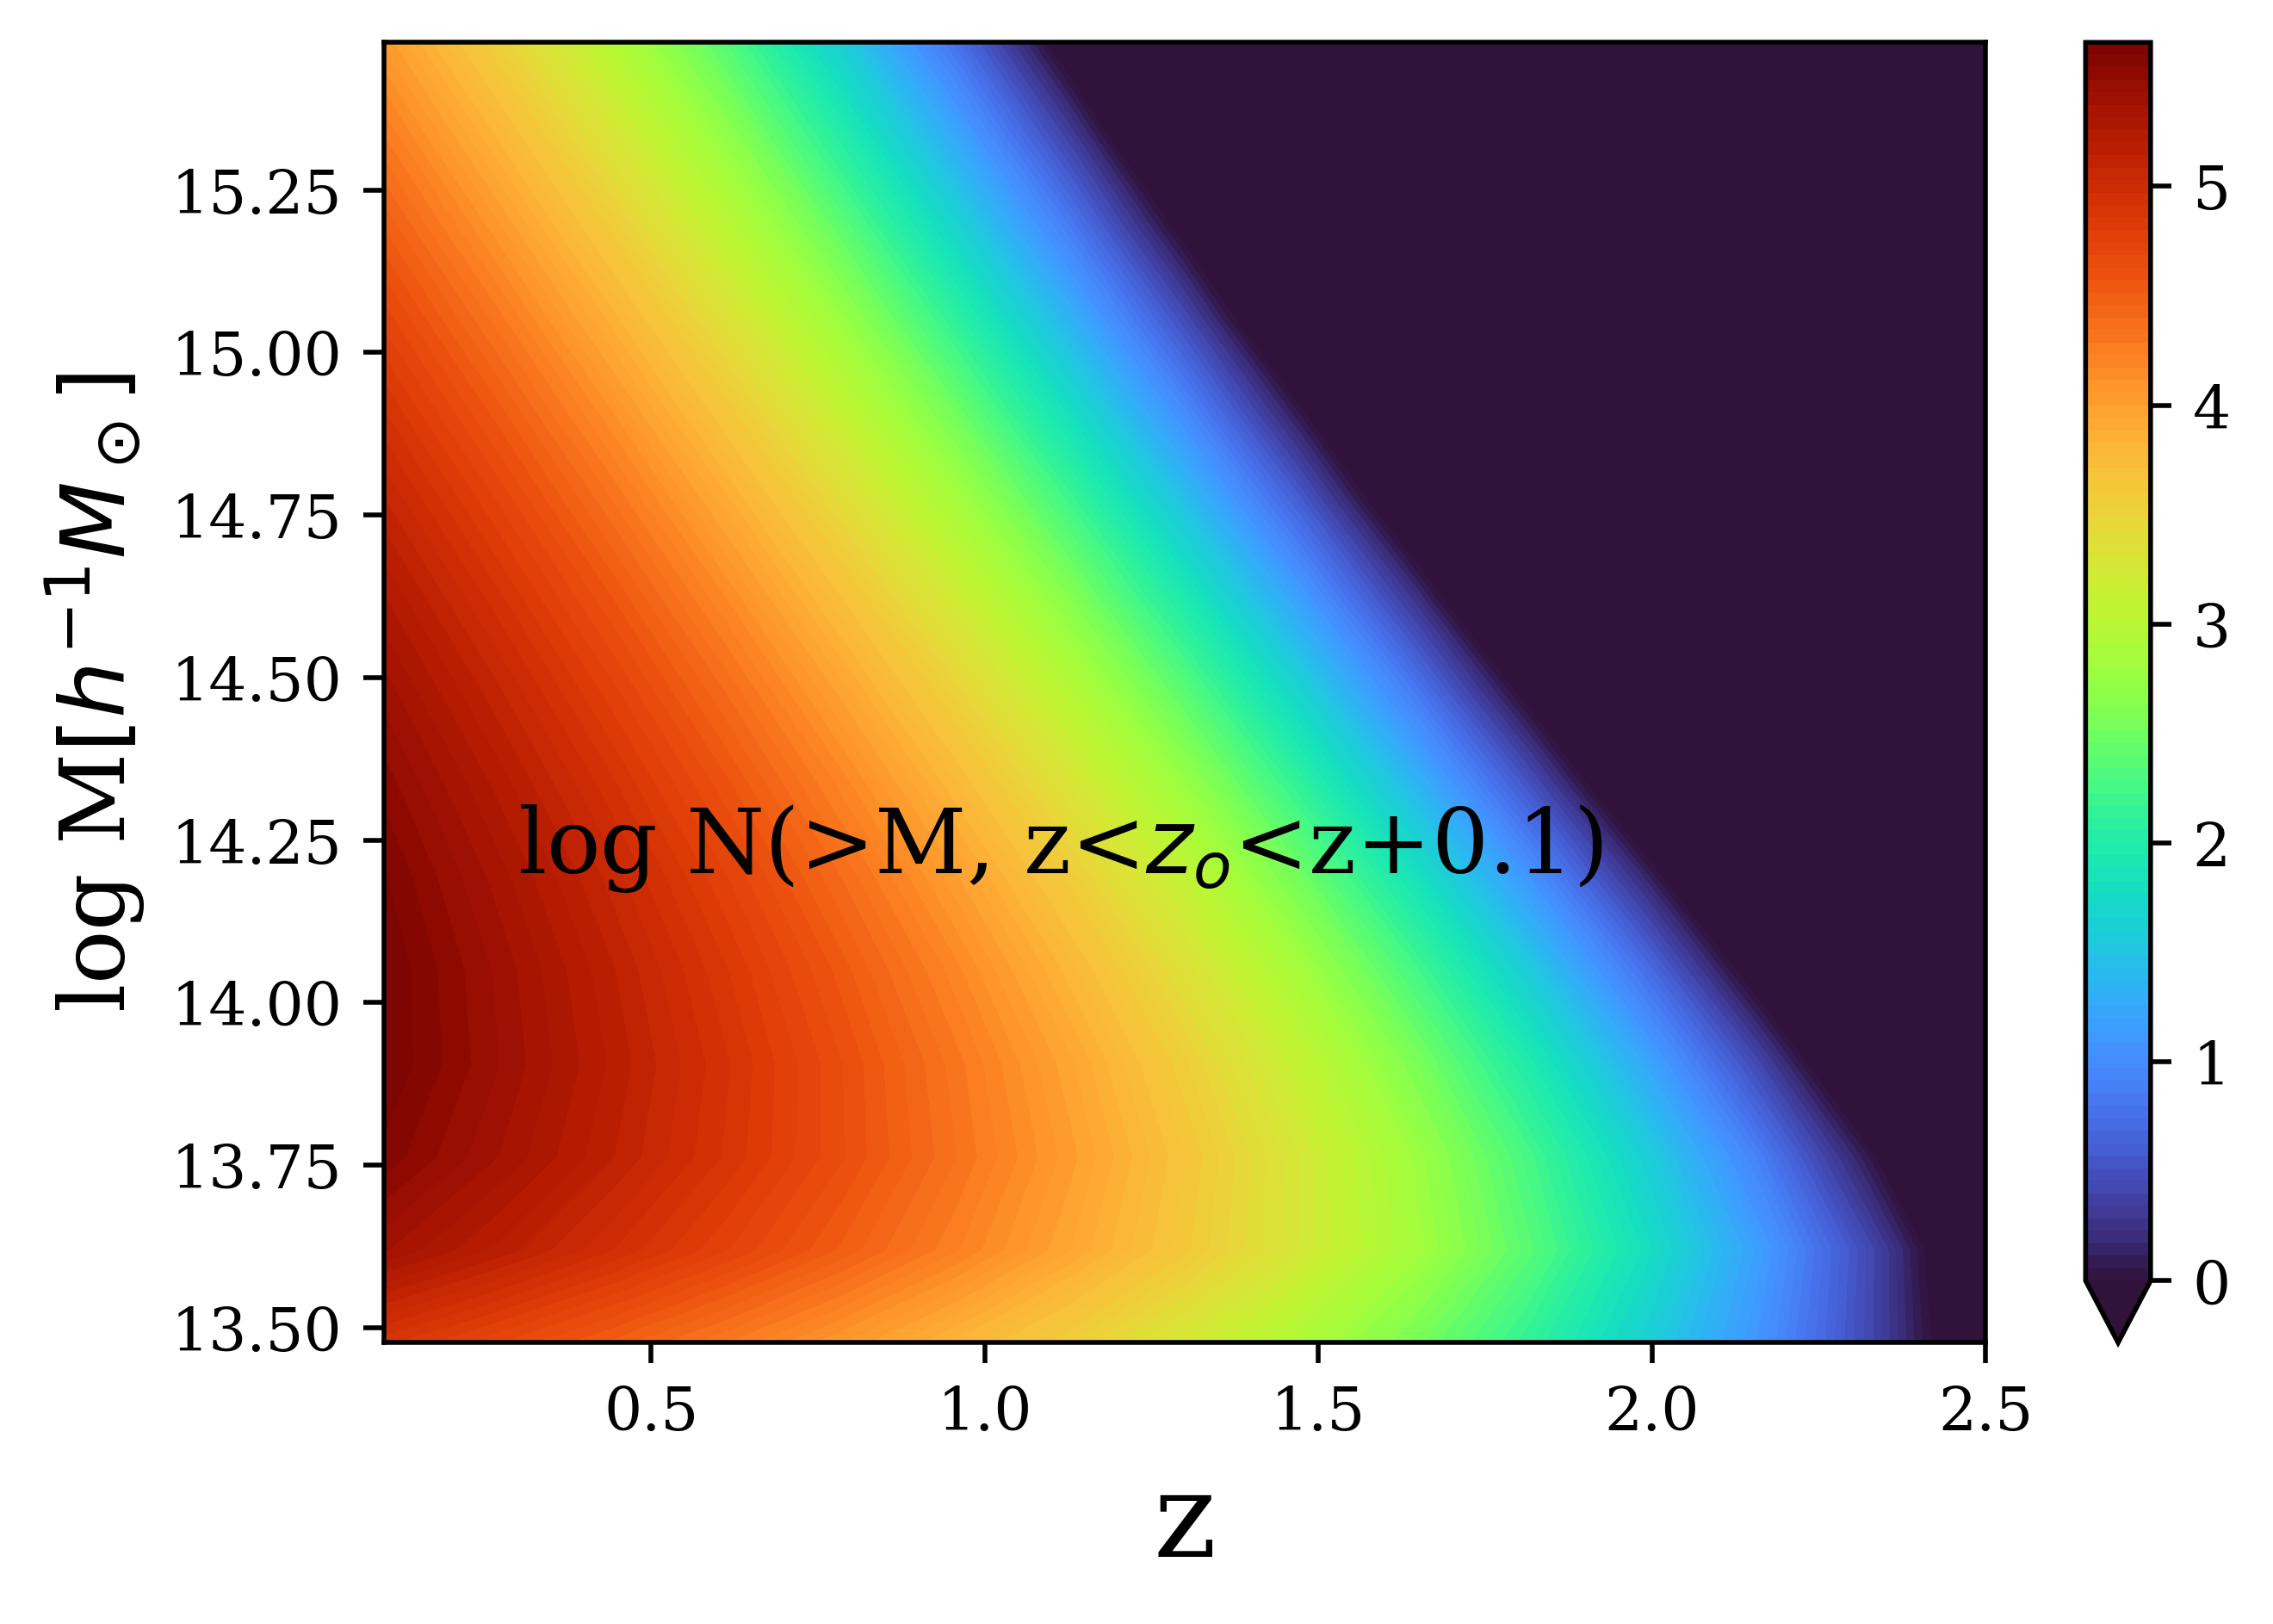

In [76]:
size = 15
masses = np.logspace(np.log10(3e13), np.log10(3e15), size)
onepluszs = np.linspace(1.1, 3.5, size)

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([masses]*size).transpose()
y = np.array([onepluszs]*size) -1
olv = 1 - omv
nom = np.zeros((size, size))
fig, axs = plt.subplots(1, 1, dpi=500)

for k in range(len(onepluszs)):
    el = onepluszs[k]
    for l in range(len(masses)):
        mt = masses[l]
        nom[k,l] =np.log10(hmf.N(z=el-1, M=mt, solid_angle=4*np.pi, sigma8=0.8, om0=0.3, ol0=0.7, prec2=100, differential=False, z2=el+0.1-1))
ax = axs
im = ax.contourf(y, np.log10(x), nom, levels=np.linspace(0, np.max(nom),100), extend='min', cmap='turbo')

ax.annotate(r'log N(>M, z<$z_o$<z+0.1)', (0.3, 14.2), size=15)
ax.set(ylabel='log M$[h^{-1}M_\odot]$', xlabel='z')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(15)

cbar = fig.colorbar(im, ax=ax, ticks=np.arange(0,6,1))

plt.savefig('./figs/integ_zbin_m_hmf.pdf', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('./figs/integ_zbin_m_hmf.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

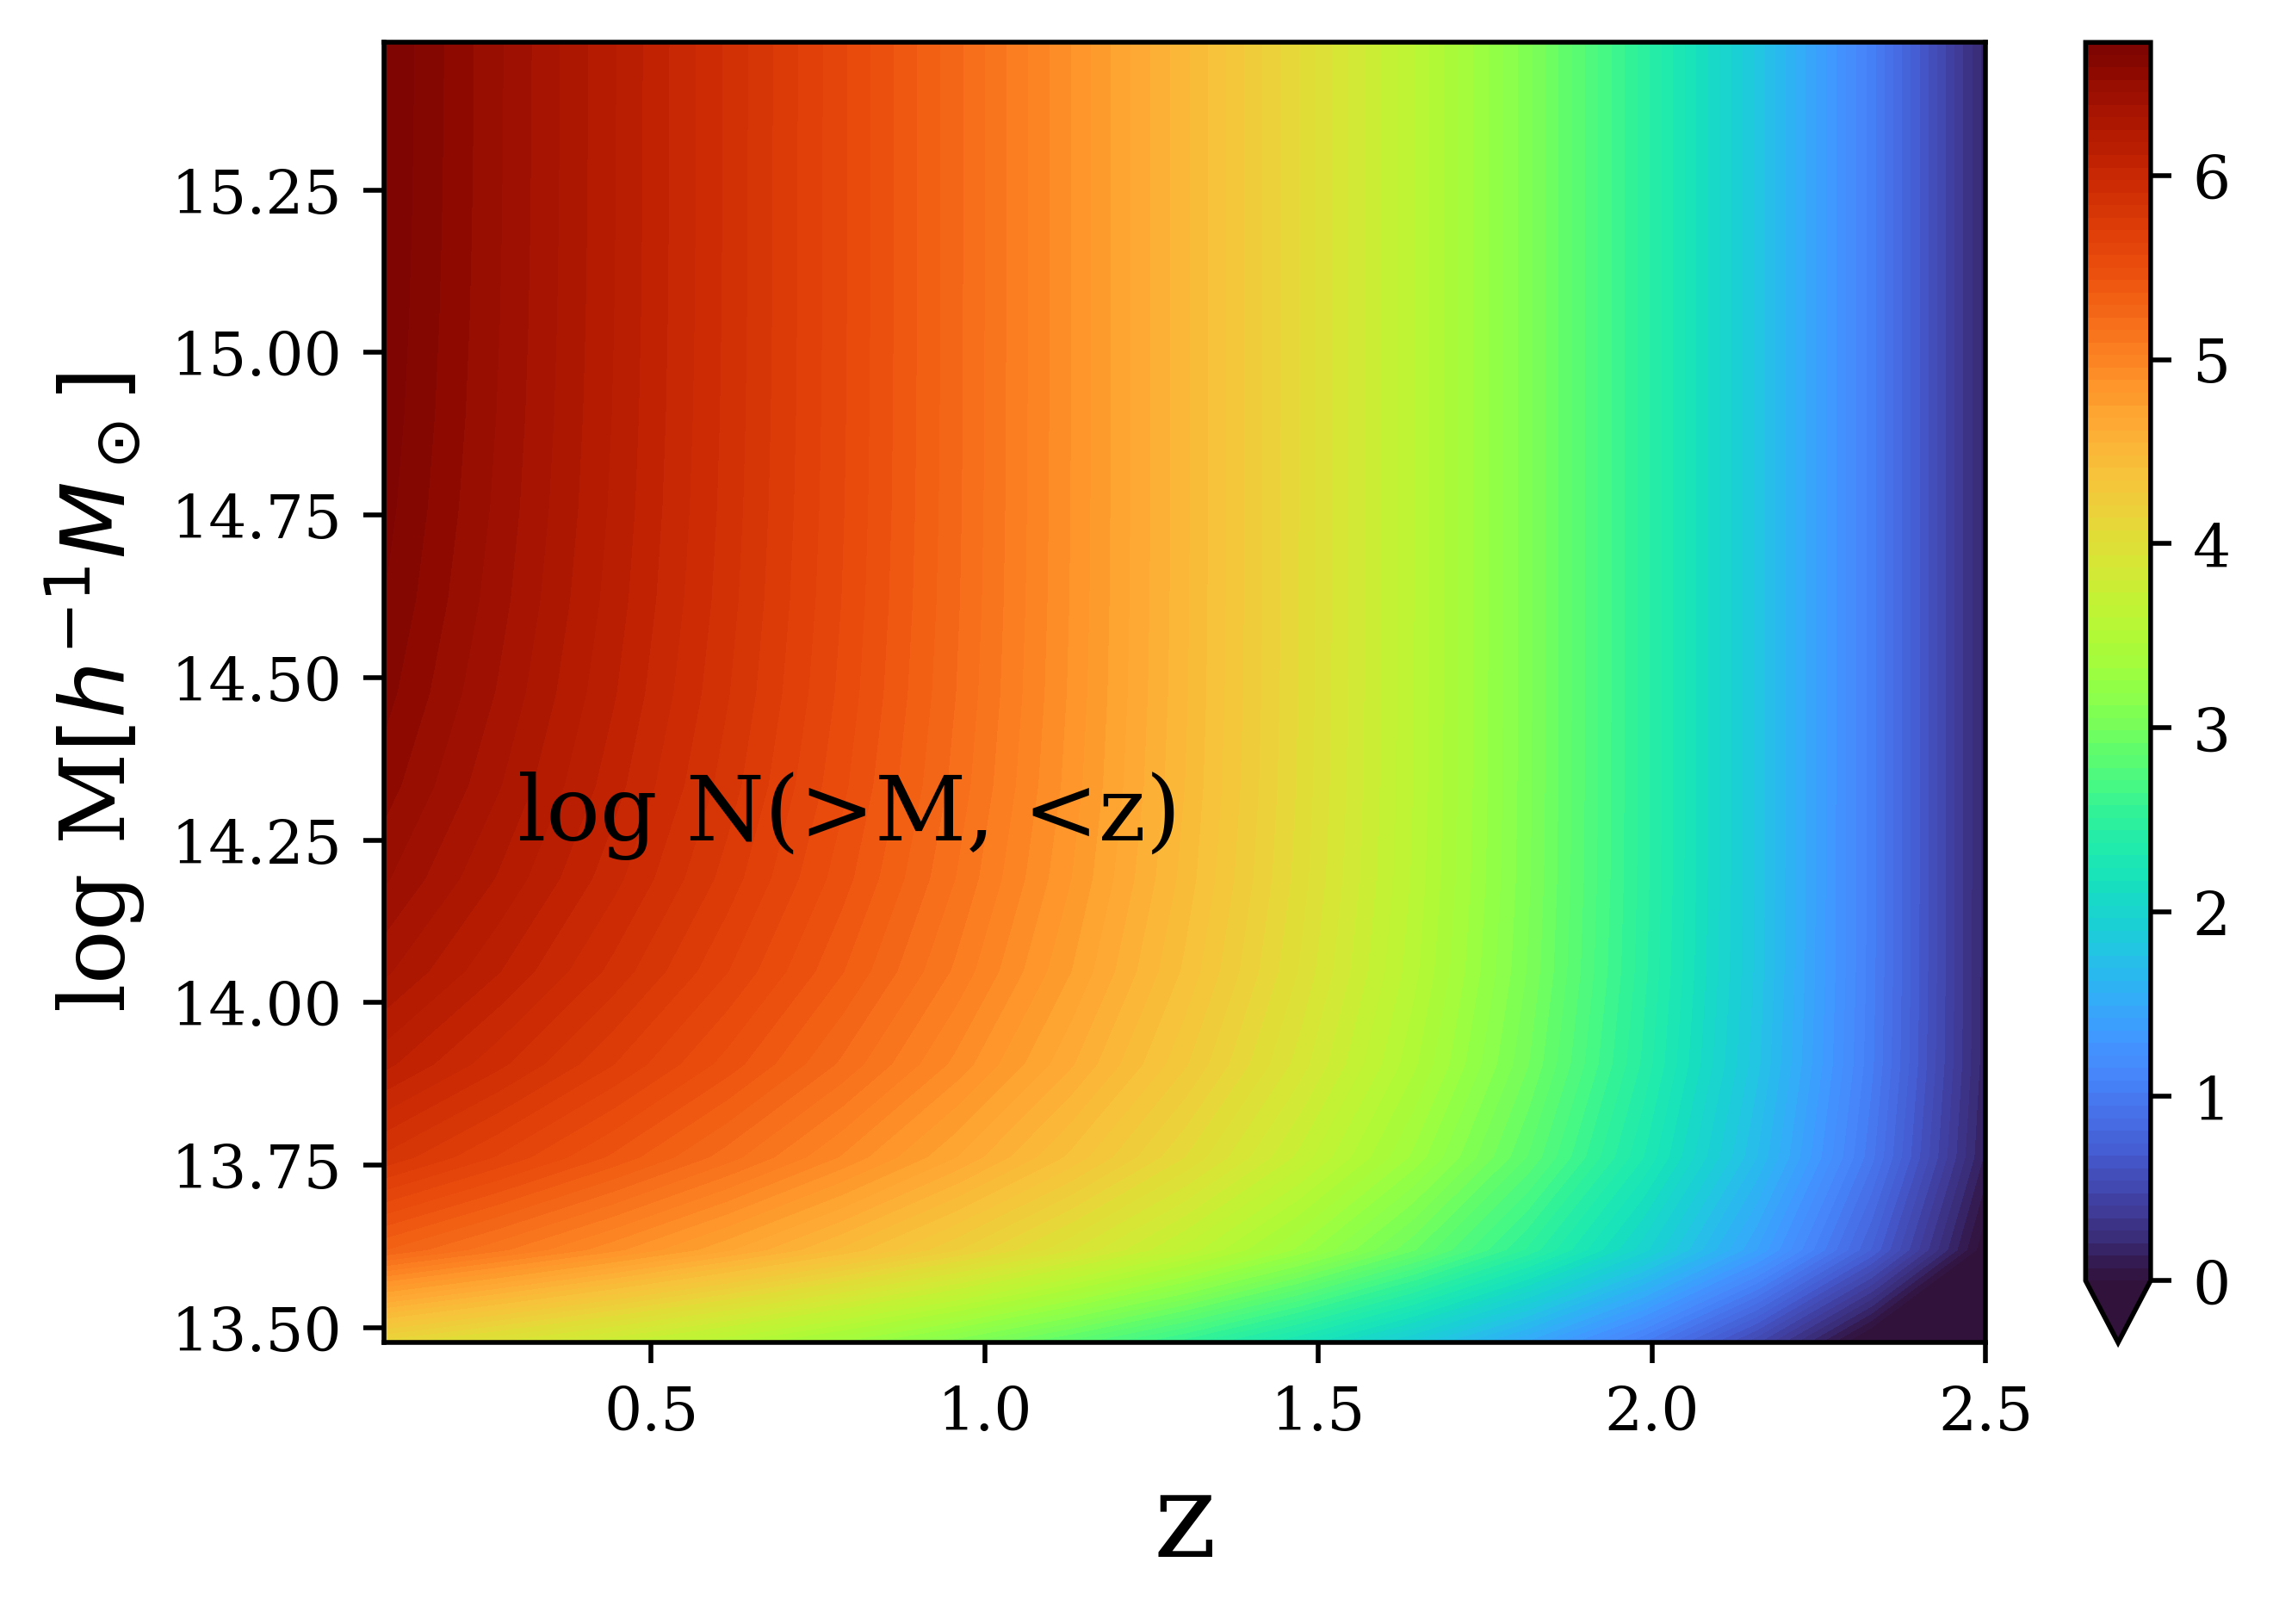

In [78]:

size = 15
masses = np.logspace(np.log10(3e13), np.log10(3e15), size)
onepluszs = np.linspace(1.1, 3.5, size)

sig8 = np.linspace(0.6, 1.1, size)
omv = np.linspace(0.15, 0.5, size)
x = np.array([masses]*size).transpose()
y = np.array([onepluszs]*size) -1
olv = 1 - omv
nom = np.zeros((size, size))
fig, axs = plt.subplots(1, 1, dpi=500)


for k in range(len(onepluszs)):
    el = onepluszs[k]
    for l in range(len(masses)):
        mt = masses[l]
        nom[k,l] =np.log10(hmf.N(z=0.001, M=mt, solid_angle=4*np.pi, sigma8=0.8, om0=0.3, ol0=0.7, prec2=100, differential=False, z2=el-1))
ax = axs
im = ax.contourf(y, np.log10(x), nom, levels=np.linspace(0, np.max(nom),100), extend='min', cmap='turbo')

ax.annotate(r'log N(>M, <z)', (0.3, 14.25), size=15)
ax.set(ylabel='log M$[h^{-1}M_\odot]$', xlabel='z')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(15)


cbar = fig.colorbar(im, ax=ax, ticks=np.arange(0,7, 1))

plt.savefig('./figs/integ_zcum_m_hmf.pdf', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('./figs/integ_zcum_m_hmf.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# High z limit

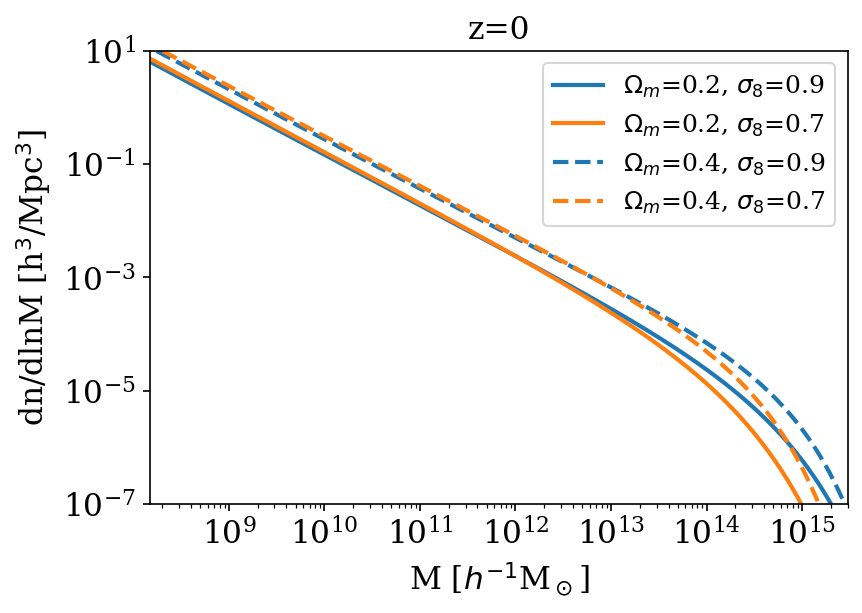

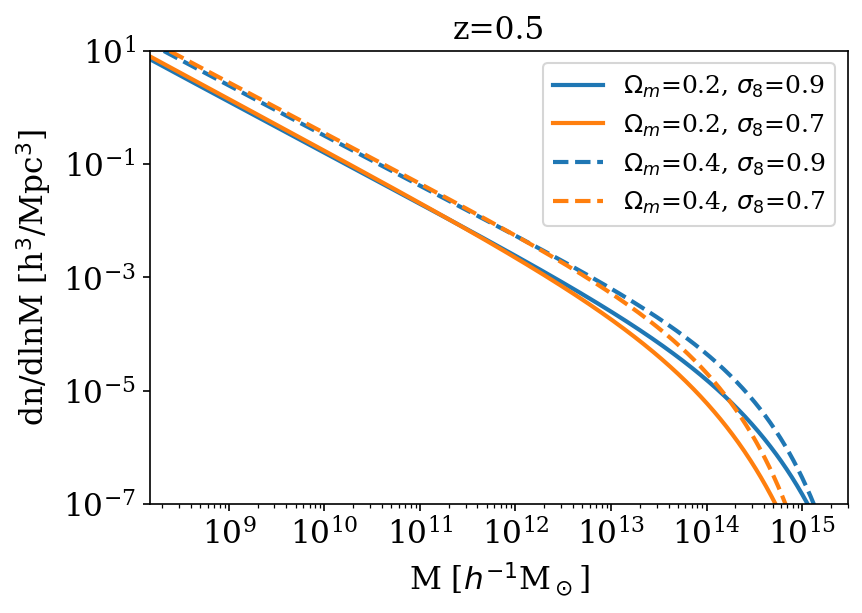

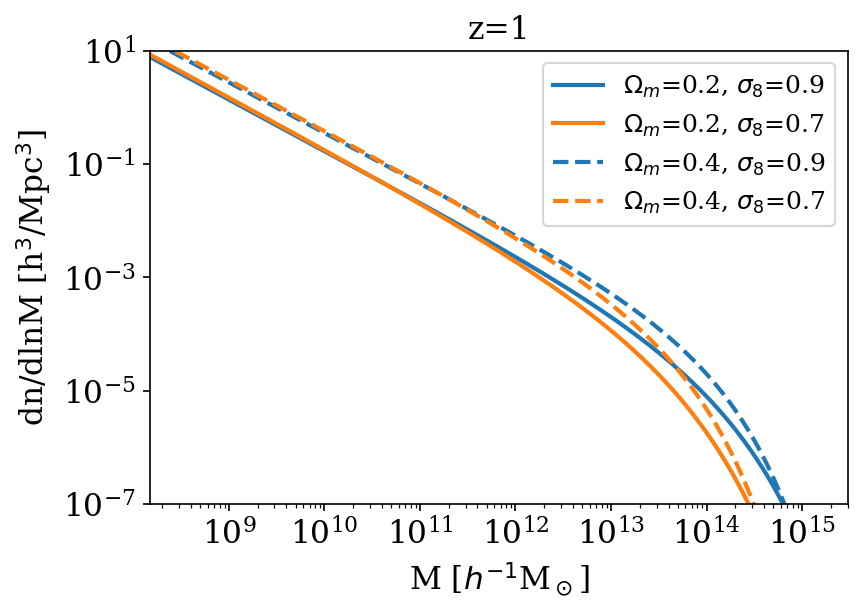

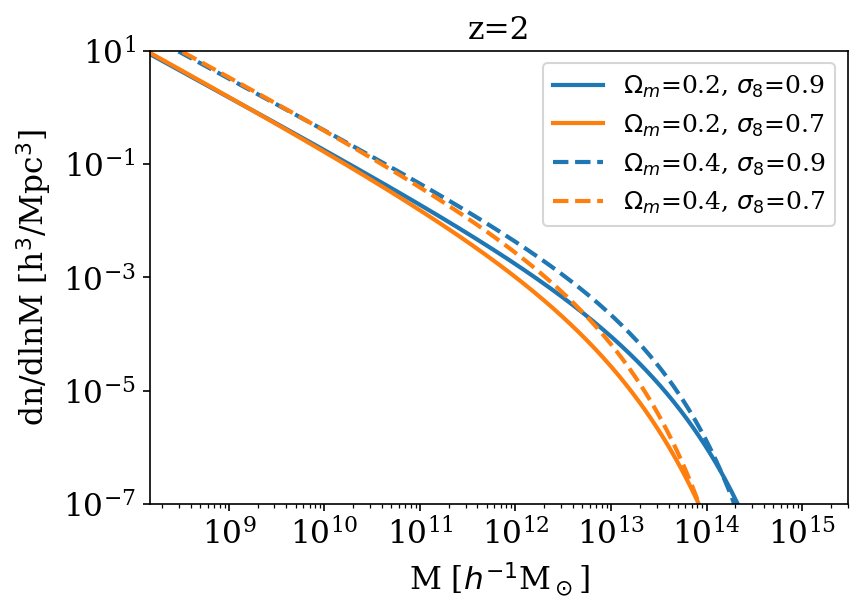

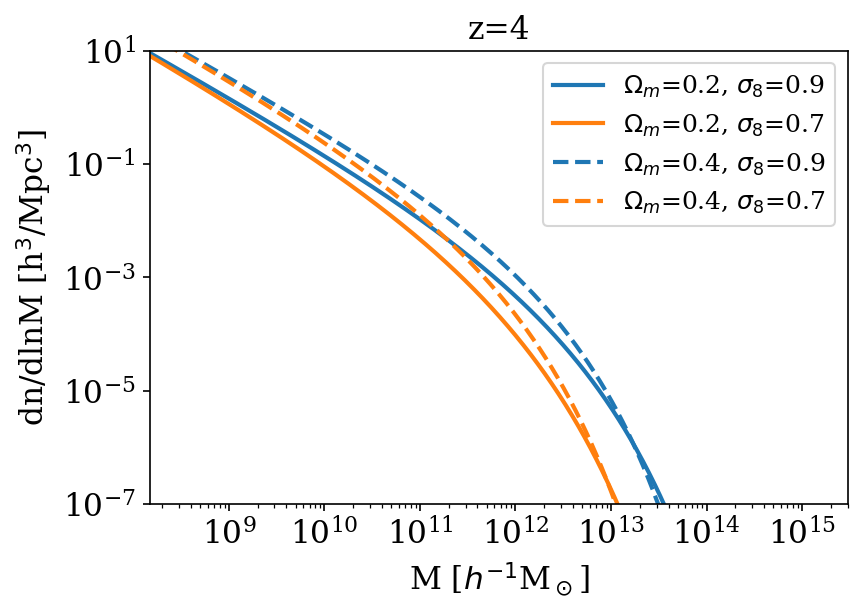

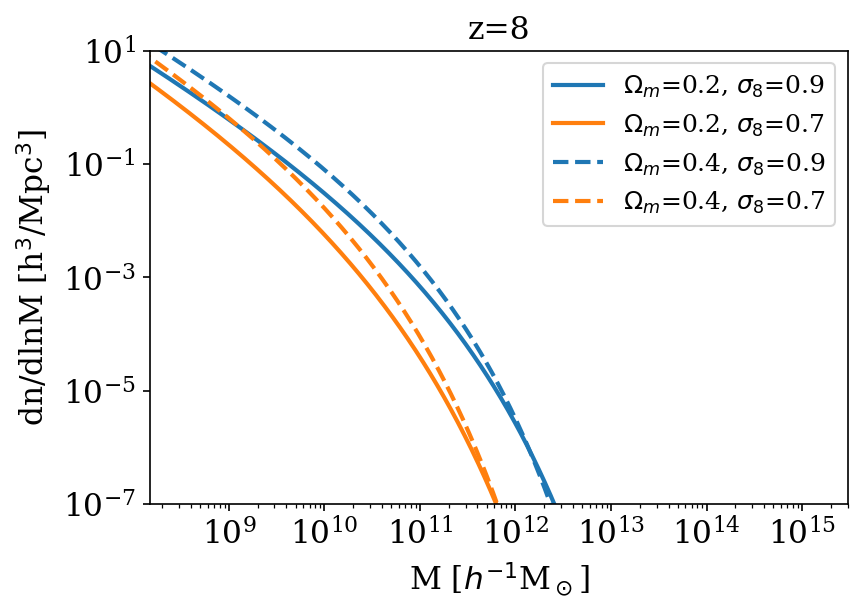

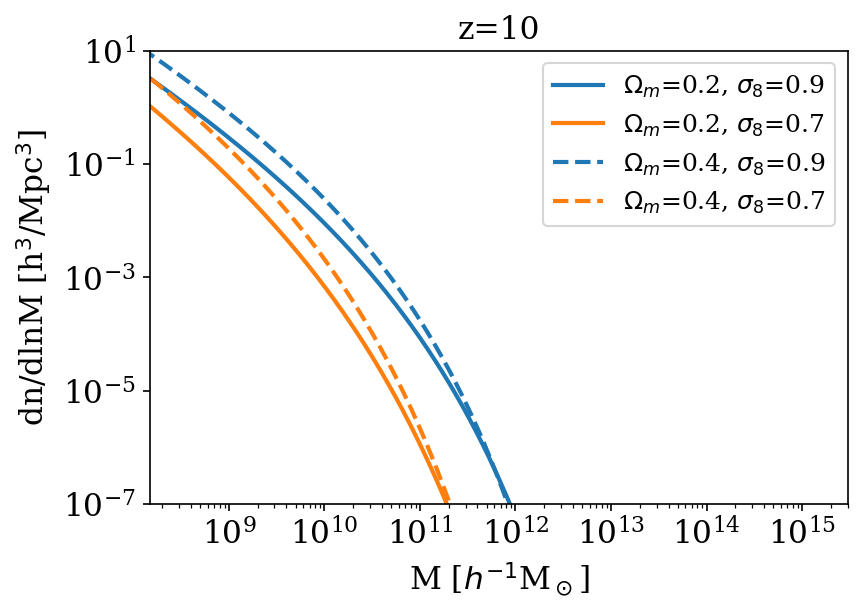

In [79]:
M = np.logspace(7,16, 1000)
z = np.array([0, 0.5, 2, 4])
oms = [0.2, 0.4]
s8 = [0.9, 0.7]
#for el in s8:
lss = ['-', '--']
zs = [0,0.5,1,2,4,8, 10]
out = 'dndlnM'
for z in zs:
    plt.figure()
    for i in range(len(oms)):
        for j in range(len(s8)):
            y2 = hmf(M, z=z, om0=oms[i], sig8=s8[j], kmax=50, prec=100, model='sheth', out=out)
            plt.loglog(M[1:-1], y2, label=r'$\Omega_m$={}, $\sigma_8$={}'.format(oms[i], s8[j]), color='C{}'.format(j), ls=lss[i], linewidth=2)
            tosave = np.array([M[1:-1],y2], dtype=np.float64)
            np.savetxt('{}_sheth_om{}_s8{}_z{}.txt'.format(out, oms[i], s8[j], z), tosave.T)
    plt.xlabel('M [$h^{-1}$M$_\odot$]', size = 15)
    plt.ylabel('dn/dlnM [h$^3$/Mpc$^{3}$]', size = 15)
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.title('z={}'.format(z), size = 15)
    plt.ylim(1e-7, 10)
    plt.xlim(1.5e8, 3e15)
    plt.legend()
    plt.savefig('./figs/{}_sheth_z{}.png'.format(out, z), bbox_inches='tight', facecolor='white', transparent=False)
    plt.savefig('./figs/{}_sheth_z{}.pdf'.format(out, z), bbox_inches='tight', facecolor='white', transparent=False)

    plt.show()
